## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project


# Formulation of a Linear Regression Model to predict GCSE and Crime Scores based on Indices of Deprivation data in London 


# Project Plan

## The Data

This project attempts to understand the relationships between the variables in the Indices of Deprivation (IoD) and GCSE, and Crime scores. We wanted to create a machine learning algorithm to predict future GCSE and Crime score based on the exploratory variables of the model.

This project utilized four datasets the IoD and GCSE scores for 2015 and 2019 retrieved from the United Kingdom Government national statistics website and were generated from the census data collected every 5 years. The IoD datasets were collected by the Ministry for Housing, Communities & Local Government and updated by Oxford Consultants for Social Inclusion. The GCSE datasets were collected by the Department for Education and updated by the Attainment Statistics Team.

#### Indices of Deprivation Data

“The English indices of deprivation measure relative deprivation in small areas in England. This includes the following seven domains” (United Kingdom Government, 2015):

- **Income**: The proportion of the population experiencing deprivation relating to low-income.
- **Employment**: The proportion of the working-age population in an area involuntarily excluded from employment.
- **Education, Skills, and Training**: The lack of attainment and skills in the local population.
- **Health and Disability**: The risk of premature death and impairment of quality of life and health.
- **Crime**: The risk of personal and material victimisation at the local level.
- **Barriers to Housing and Services**: The physical and financial accessibility of housing and local services.
- **Living Environment**: The quality of the local environment.


#### Key Stage 4 GCSE Data

“The Key Stage 4 GCSE score is the legal term for the two years of school education which incorporate GCSEs in maintained schools. The attainment 8 score subset was used. This provided a description of how well all pupils in a school performed” (Department for Education, 2022). Average attainment 8 scores are utilised to represent the overall GCSE scores.

All of the variables in the four datasets are floats. 

    
### Context of Data

The GCSE scores collected are only for state-maintained schools. However, the City of London has only one state-maintained school therefore there is no GCSE score data in the dataset to represent this area. To improve the accuracy of our analysis we decided to remove the City of London from the dataset to prevent the analysis from being skewed. Despite this limitation we should still be able to draw accurate and sound conclusions for the remaining boroughs.


## Project Aim and Objectives

### Overview of Project Aim

This project seeks to determine the association between deprivation (Indices of Deprivation score) and academic performance (GCSE scores), as well as the Crime score of populations in London, and to build a machine learning algorithms to predict future academic performance and crime rates. The results of this project may allow policymakers an opportunity to focus their effort to improve GCSE scores and reduce crime across London based on the variables selected in our machine learning algorithm.  

To determine these associations, we will start by correlating all variables to study their individual relationships with the outcomes and with each other and plot a scatter matrix to display the correlations. To build the machine learning algorithm, we will use a Linear Regression Model to match and test the factors starting with the strongest correlating variables. This will allow us to find the best-fit explanatory variables for our multivariable Linear Regression Model. 

We will conduct the following testing and visualization process: 
- Validate our model accuracy using R², F-test (ANOVA), and residual tests; 
- Plot the coefficient values to visualize the strength of the chosen variables;
- Plot a residual map to display the variability explained by our models.



### Specific Objective(s)

In order to achieve our project aim we will sequentially complete a series of project objectives. This process will allow us to ensure that our project has considered all the factors necessary to draw conclusions. Our project will address the following objectives:   
- **Objective 1**: To study the association between deprivation variables and to build a Linear Regression Model for GCSE score in 2015.
- **Objective 2**: To test the Linear Regression Model for GCSE score on 2019 dataset.
- **Objective 3**: To build a Linear Regression Model for Crime score in 2015 and to test the model on 2019 dataset.
- **Objective 4**: To determine how the distributions vary spatially between the inner and outer boroughs of London. 

We achieved our project aim and objectives by conducting a specific set of steps outlined in the system design section below.

## System Design (5 marks)

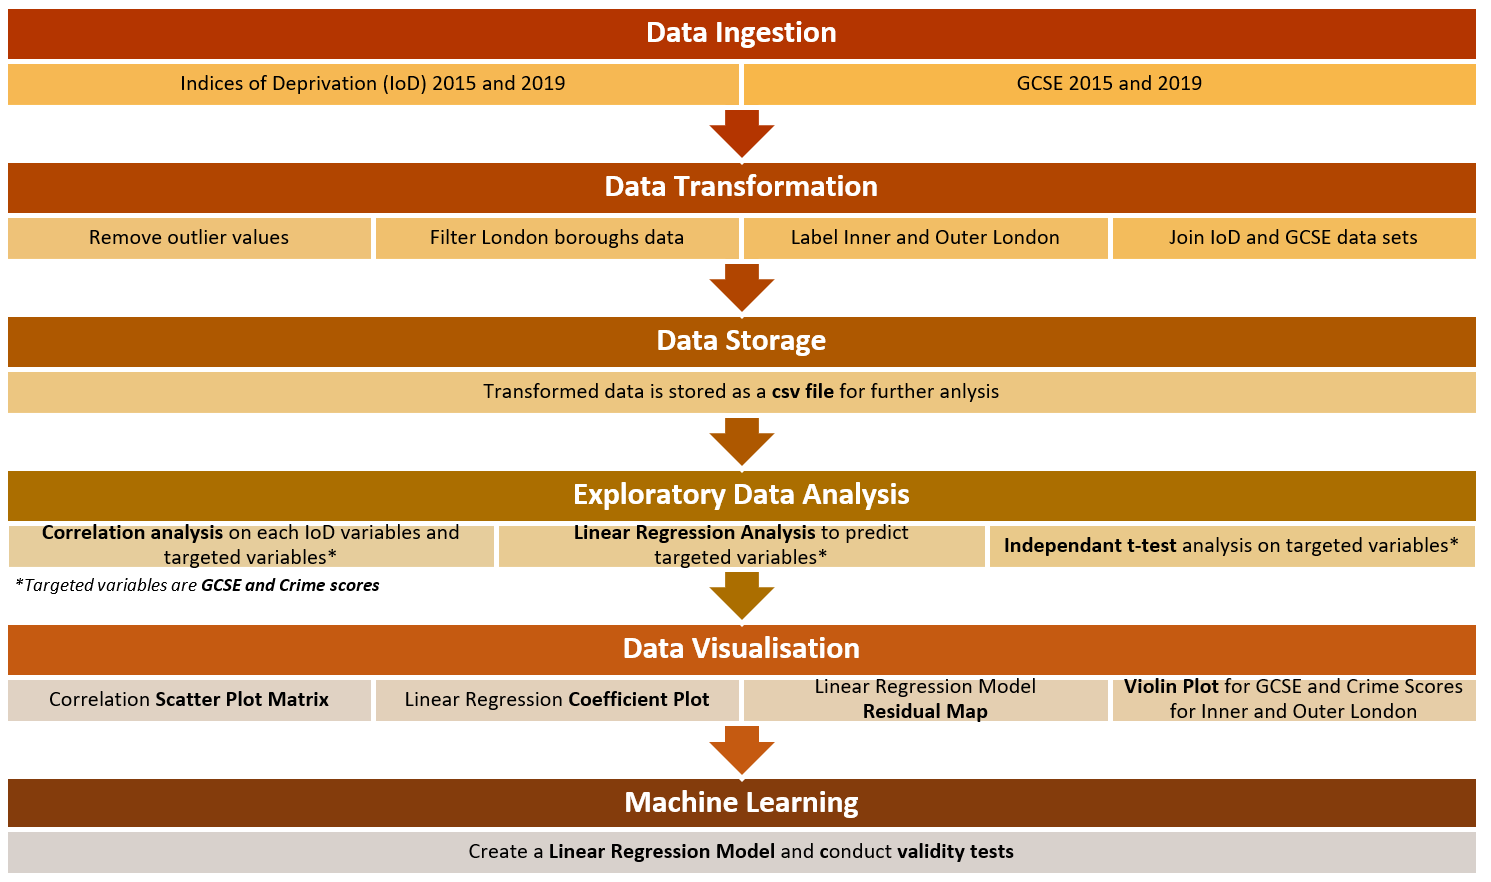

<center><b>Figure 1 : An overview of the proposed system</b></center>

### Architecture

Firstly, the datasets collected will undergo a series of data transformation which includes removing outliers, filtering interested variables, labelling, and merging of datasets. Other wrangling processes such as rows sorting and columns renaming are done where necessary. The transformed data is then saved as a csv file for further analysis.

Next, the exploratory data analysis conducted are correlation, regression and independent t-test analysis. These analysis tools are used to study the relationship between variables, to predict future values of targeted variables, and to test the significant difference between group of data tested. Then, data visualisations are created to display these relationships.

Finally, a Linear Regression Model with selected explanatory variables is created to predict targeted variables. Several validity tests are conducted to test the fitness of the model. This model is then tested on another datasets for comparison and the residuals are mapped. 

  
### Processing Modules and Algorithms

- Cleaning the data by removing outliers, filtering interested variables, and labelling.
- Combining different datasets according to year.
- Conducting exploratory analysis such as correlation, linear regression and independent t-test.
- Communicating the relationship through data visualisations such as scatter plot matrix, coefficient plot, residual map, and violin plot.
- Create a Linear Regression Model based on selected explanatory variables.
- Conduct validity tests such as Coefficient of Determination (R²), F-test (ANOVA), and Residual test (standardizes residual, normality, auto-correlation).

# Program Code

## Part 1 : Data Cleaning and Merging

For this project, we will run analysis on the datasets acquired. However, since the data is ingested from various resources, the datasets are unstructured and may consist outliers, missing values, and incorrect formatting. To ensure that further analysis can be done on the datasets, we will have to transform these data through some cleaning processes and produce a standardized data. Finally,  the standardized datasets of IoD and GCSE will be merged according to the year of study(i.e. 2015 and 2019). The merged and standardized datasets will then be saved in `csv` format for further analysis.

### Import Modules and Read Data

Before we start cleaning the data and developing a statistical model for our data analysis, we will import all modules used for code and read all raw datasets collected as below:

In [3]:
# Importing Modules

import pandas as pd #provide data structures
import numpy as np #numerical module 
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #fancier visualisations 
import statsmodels.api as sm #regression
from statsmodels.sandbox.regression.predstd import wls_prediction_std #allows prediction
from scipy.stats import pearsonr #compute p-value
from statsmodels.stats.diagnostic import normal_ad #test for normal distribution unknown mean and variance
from statsmodels.stats.stattools import durbin_watson #regression model residuals
from scipy import stats #statistics function
import numba #just-in-time compiler
import geopandas as gpd #geospatial
import palettable as pltt #color palettes for map
import descartes #use geometric objects as matplotlib paths and patches
from pysal.viz import mapclassify  #classification schemes for choropleth maps
from matplotlib_scalebar.scalebar import ScaleBar #displaying calibrated images plotted
import contextily as cx #allows to get location information
from pysal.lib import weights #use notions of contiguity to define neighboring observations
from pysal.lib import io #construction and interactive editing of spatial weights matrices & graphs
import math #extends the list of mathematical functions
%matplotlib inline 
pd.options.mode.chained_assignment = None #raise an exception, warn, or no action for chained assignment
pd.set_option('display.max_columns', None) #display all columns of dataframe

In [4]:
#Read raw datasets collected

IoD_2015 = pd.read_csv('IMD_2015.csv')
IoD_2019 = pd.read_csv('IMD_2019.csv')
GCSE_2015 = pd.read_csv('GCSE_2015.csv')
GCSE_2019 = pd.read_csv('GCSE_2019.csv')

### 2015 IoD Dataset

First, we will call the 2015 Indices of Deprivation (IoD) dataset and do necessary cleaning before joining with 2015 GCSE scores dataset later on.

In [5]:
IoD_2015.head() #Call the top data to have an overview of the dataset

LSOA code (2011) LSOA name (2011) Local Authority District code (2013)  \
0        E01031349        Adur 001A                            E07000223   
1        E01031350        Adur 001B                            E07000223   
2        E01031351        Adur 001C                            E07000223   
3        E01031352        Adur 001D                            E07000223   
4        E01031370        Adur 001E                            E07000223   

  Local Authority District name (2013)  \
0                                 Adur   
1                                 Adur   
2                                 Adur   
3                                 Adur   
4                                 Adur   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                     12.389                0.096   
1                                     28.619                0.187   
2                                     11.713                0.065   
3                                     16.446                0.117   
4                                     18.265                0.102   

   Employment Score (rate)  Education, Skills and Training Score  \
0                    0.083                                20.055   
1                    0.162                                34.653   
2                    0.066                                26.334   
3                    0.113                                25.779   
4                    0.115                                32.056   

   Health Deprivation and Disability Score  Crime Score  \
0                                   -0.718        0.242   
1                                    0.722        0.244   
2                                   -0.616        0.495   
3                                   -0.234        0.026   
4                                    0.082        0.182   

   Barriers to Housing and Services Score  Living Environment Score  \
0                                  10.586                    15.180   
1                                  24.689                    17.837   
2                                  13.631                    11.150   
3                                  17.803                    10.677   
4                                  15.482                    15.378   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                              0.143                  
1                                              0.211                  
2                                              0.077                  
3                                              0.210                  
4                                              0.117                  

   Income Deprivation Affecting Older People (IDAOPI) Score (rate)  \
0                                              0.103                 
1                                              0.269                 
2                                              0.079                 
3                                              0.087                 
4                                              0.131                 

   Children and Young People Sub-domain Score  Adult Skills Sub-domain Score  \
0                                       0.098                          0.333   
1                                       0.470                          0.426   
2                                       0.395                          0.357   
3                                       0.348                          0.359   
4                                       0.840                          0.338   

   Geographical Barriers Sub-domain Score  Wider Barriers Sub-domain Score  \
0                                  -0.346                           -0.721   
1                                   0.234                            1.104   
2                                   0.035                           -1.048   
3                                   0.233    

Based on the overview above, it can be seen that some data are repetitive, such as the LSOA code and names. We will hence remove these data.

In [6]:
#remove repetitive columns
del IoD_2015['LSOA code (2011)']
del IoD_2015['LSOA name (2011)']

In [7]:
set(IoD_2015['Local Authority District name (2013)'].values) #check list of districts in the dataset

{'Adur',
 'Allerdale',
 'Amber Valley',
 'Arun',
 'Ashfield',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barking and Dagenham',
 'Barnet',
 'Barnsley',
 'Barrow-in-Furness',
 'Basildon',
 'Basingstoke and Deane',
 'Bassetlaw',
 'Bath and North East Somerset',
 'Bedford',
 'Bexley',
 'Birmingham',
 'Blaby',
 'Blackburn with Darwen',
 'Blackpool',
 'Bolsover',
 'Bolton',
 'Boston',
 'Bournemouth',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Breckland',
 'Brent',
 'Brentwood',
 'Brighton and Hove',
 'Bristol, City of',
 'Broadland',
 'Bromley',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Bury',
 'Calderdale',
 'Cambridge',
 'Camden',
 'Cannock Chase',
 'Canterbury',
 'Carlisle',
 'Castle Point',
 'Central Bedfordshire',
 'Charnwood',
 'Chelmsford',
 'Cheltenham',
 'Cherwell',
 'Cheshire East',
 'Cheshire West and Chester',
 'Chesterfield',
 'Chichester',
 'Chiltern',
 'Chorley',
 'Christchurch',
 'City of London',
 'Colchester',
 'Copeland',
 'Corby',
 'Cornwall',
 'C

Based on the list above, it can be seen that these dataset consist of IoD score for all of England. Since our area of interest is London, we will hence create a subset consisting of data for London only.

In [8]:
IoD_2015['City'] = 1    #create a new empty column to label London boroughs

#The list below contains LSOA code for all boroughs in London
London = ['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007', 'E09000008', 
          'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016', 
          'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 
          'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031', 'E09000032', 'E09000033']

for i in IoD_2015.index:
    if IoD_2015['Local Authority District code (2013)'][i] in London:
        IoD_2015.City[i] = 'London'    #label the London boroughs based on the list above


In [9]:
London_2015 = IoD_2015[IoD_2015['City'] == 'London'] #create a subset dataframe for only London boroughs
London_2015['Local Authority District name (2013)'].value_counts() #view the borough values and their counts

Croydon                   220
Barnet                    211
Bromley                   197
Ealing                    196
Enfield                   183
Wandsworth                179
Lambeth                   178
Brent                     173
Lewisham                  169
Southwark                 166
Newham                    164
Redbridge                 161
Hillingdon                161
Greenwich                 151
Havering                  150
Bexley                    146
Haringey                  145
Waltham Forest            144
Tower Hamlets             144
Hackney                   144
Hounslow                  142
Harrow                    137
Camden                    133
Westminster               128
Merton                    124
Islington                 123
Sutton                    121
Richmond upon Thames      115
Hammersmith and Fulham    113
Barking and Dagenham      110
Kensington and Chelsea    103
Kingston upon Thames       98
City of London              6
Name: Loca

The value count above shows that there are many data for each boroughs. This is because the data was collected based on LSOA. However, we are only interested to compare between boroughs and not individual LSOAs. Hence, we will group the data according to boroughs by calculating the mean value.

In [10]:
#group the LSOA data based on their borough name and code by calculating the mean value
London_2015 = London_2015.groupby(['Local Authority District name (2013)', 'Local Authority District code (2013)']).mean()
London_2015.head()

Index of Multiple Deprivation (IMD) Score  \
Local Authority District name (2013) Local Authority District code (2013)                                              
Barking and Dagenham                 E09000002                                                             34.687073   
Barnet                               E09000003                                                             17.659190   
Bexley                               E09000004                                                             15.800226   
Brent                                E09000005                                                             26.197370   
Bromley                              E09000006                                                             15.073574   

                                                                           Income Score (rate)  \
Local Authority District name (2013) Local Authority District code (2013)                        
Barking and Dagenham                 E09000002                                        0.242482   
Barnet                               E09000003                                        0.131616   
Bexley                               E09000004                                        0.123062   
Brent                                E09000005                                        0.185023   
Bromley                              E09000006                                        0.111157   

                                                                           Employment Score (rate)  \
Local Authority District name (2013) Local Authority District code (2013)                            
Barking and Dagenham                 E09000002                                            0.158109   
Barnet                               E09000003                                            0.088659   
Bexley                               E09000004                                            0.094781   
Brent                                E09000005                                            0.119237   
Bromley                              E09000006                                            0.086355   

                                                                           Education, Skills and Training Score  \
Local Authority District name (2013) Local Authority District code (2013)                                         
Barking and Dagenham                 E09000002                                                        27.344064   
Barnet                               E09000003                                                         8.430455   
Bexley                               E09000004                                                        18.210938   
Brent                                E09000005                                                        16.003197   
Bromley                              E09000006                                                        11.552751   

                                                                           Health Deprivation and Disability Score  \
Local Authority District name (2013) Local Authority District code (2013)                                            
Barking and Dagenham                 E09000002                                                            0.382209   
Barnet                               E09000003                                                           -0.736000   
Bexley                               E09000004                                                           -0.657753   
Brent                                E09000005                                                           -0.237769   
Bromley                              E09000006                                                           -0.777340   

                                                                           Crime Score  \
Local Authority District name (2013) Local Authority District code (2013)                
Barking and Dagenha

In [11]:
#reset index to create a new index and reset the district names and codes as columns
London_2015 = London_2015.reset_index()
London_2015.head()

Local Authority District name (2013) Local Authority District code (2013)  \
0                 Barking and Dagenham                            E09000002   
1                               Barnet                            E09000003   
2                               Bexley                            E09000004   
3                                Brent                            E09000005   
4                              Bromley                            E09000006   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                  34.687073             0.242482   
1                                  17.659190             0.131616   
2                                  15.800226             0.123062   
3                                  26.197370             0.185023   
4                                  15.073574             0.111157   

   Employment Score (rate)  Education, Skills and Training Score  \
0                 0.158109                             27.344064   
1                 0.088659                              8.430455   
2                 0.094781                             18.210938   
3                 0.119237                             16.003197   
4                 0.086355                             11.552751   

   Health Deprivation and Disability Score  Crime Score  \
0                                 0.382209     0.905873   
1                                -0.736000     0.387526   
2                                -0.657753     0.055014   
3                                -0.237769     0.620491   
4                                -0.777340     0.257726   

   Barriers to Housing and Services Score  Living Environment Score  \
0                               37.327209                 26.461627   
1                               30.880275                 23.490559   
2                               23.229856                 14.166719   
3                               37.762249                 28.904058   
4                               24.687340                 15.740381   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                           0.314582                  
1                                           0.167701                  
2                                           0.176562                  
3                                           0.247607                  
4                                           0.153244                  

   Income Deprivation Affecting Older People (IDAOPI) Score (rate)  \
0                                           0.292582                 
1                                           0.192199                 
2                                           0.135247                 
3                                           0.291272                 
4                                           0.131411                 

   Children and Young People Sub-domain Score  Adult Skills Sub-domain Score  \
0                                    0.163091                       0.391109   
1                                   -0.624597                       0.221351   
2                                   -0.311479                       0.338733   
3                                   -0.183231                       0.297468   
4                                   -0.583081                       0.257665   

   Geographical Barriers Sub-domain Score  Wider Barriers Sub-domain Score  \
0                               -0.632300                         4.545382   
1                               -0.365175                         3.154332   
2                               -0.164438                         1.515048   
3                               -0.598358                         4.487803   
4                               -0.111284                         1.515137   

   Indoors Sub-domain Score  Outdoors Sub-domain Score  
0                  0.289373                   0.602945  
1        

As we are also going to study the relationship between inner and outer London, we will create a new column to label the boroughs accordingly.

In [12]:
London_2015['Inner_Outer_London'] = 1

#The list below contains all the boroughs in Inner London
Inner_London = ['Camden', 'City of London', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Islington', 
                'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Newham', 'Southwark', 'Tower Hamlets', 
                'Wandsworth', 'Westminster']
for i in London_2015.index:
    if London_2015['Local Authority District name (2013)'][i] in Inner_London:
        London_2015.Inner_Outer_London[i] = 'Inner'   #label all boroughs in the Inner London list as "Inner"
    else:
        London_2015.Inner_Outer_London[i] = 'Outer'   #label boroughs not in the Inner London list as "Outer"

In [13]:
#sort the dataframe according to the boroughs code
London_2015 = London_2015.sort_values(by = 'Local Authority District code (2013)')

#reset the index to follow the new order
London_2015 = London_2015.reset_index(drop = True)
London_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Local Authority District name (2013)                              33 non-null     object 
 1   Local Authority District code (2013)                              33 non-null     object 
 2   Index of Multiple Deprivation (IMD) Score                         33 non-null     float64
 3   Income Score (rate)                                               33 non-null     float64
 4   Employment Score (rate)                                           33 non-null     float64
 5   Education, Skills and Training Score                              33 non-null     float64
 6   Health Deprivation and Disability Score                           33 non-null     float64
 7   Crime Score                          

The 2015 IoD data is now ready for further processing, with 33 total rows representing each boroughs in London and labelled accordingly as either Inner or Outer London.

### 2015 GCSE Dataset

Next, we will join the 2015 GCSE dataset to be joined to the IoD dataset.

In [14]:
pd.set_option('display.max_rows', None) #set to display all rows of data

GCSE_2015

Table LA2: Average Attainment 8 scores1 by local authority2 and region  \
0             Year: 2014/15 to 2015/163 (Provisional)4                       
1                                    Coverage: England                       
2                                                  NaN                       
3                                                  NaN                       
4                                                  NaN                       
5                                                  NaN                       
6                                                  NaN                       
7                                                  NaN                       
8                                            E92000001                       
9                                                  NaN                       
10                                           E12000001                       
11                                           E06000047                       
12                                           E06000005                       
13                                           E08000037                       
14                                           E06000001                       
15                                           E06000002                       
16                                           E08000021                       
17                                           E08000022                       
18                                           E06000057                       
19                                           E06000003                       
20                                           E08000023                       
21                                           E06000004                       
22                                           E08000024                       
23                                                 NaN                       
24                                           E12000002                       
25                                           E06000008                       
26                                           E06000009                       
27                                           E08000001                       
28                                           E08000002                       
29                                           E06000049                       
30                                           E06000050                       
31                                           E10000006                       
32                                           E06000006                       
33                                           E08000011                       
34                                           E10000017                       
35                                           E08000012                       
36                                           E08000003                       
37                                           E08000004                       
38                                           E08000005                       
39                                           E08000006                       
40                                           E08000014                       
41                                           E08000013                       
42                                           E08000007                       
43                                           E08000008                       
44                                           E08000009                       
45                                           E06000007                       
46                                           E08000010                       
47                                           E08000015                       
48                                                 NaN                       
49                                           E12000003                       
50                        

Based on the dataset above, we can see that there are a lot of NaN values which has to be removed for a cleaner data. However, it can be seen that the District Codes is under the first column, while the GCSE scores for 2015 is under the 'Unnamed: 4' column.

In [15]:
gcse_2015 = GCSE_2015.iloc[:,[0,4]] #create a subset of only interested data
gcse_2015 = gcse_2015.dropna(axis = 0) #drop the NaN values
gcse_2015.head() #check the new subset

Table LA2: Average Attainment 8 scores1 by local authority2 and region  \
8                                           E92000001                       
10                                          E12000001                       
11                                          E06000047                       
12                                          E06000005                       
13                                          E08000037                       

   Unnamed: 4  
8        48.2  
10       48.5  
11       49.0  
12       48.2  
13       49.8

In [16]:
#rename the column
gcse_2015 = gcse_2015.rename({'Table LA2: Average Attainment 8 scores1 by local authority2 and region' : 'District Code',
                             'Unnamed: 4' : 'GCSE'}, axis = 1)

Next, we will merge the GCSE dataset onto the IoD dataset by mapping the District codes.

In [17]:
#join the GCSE score to the IoD dataset by mapping the district code column on both datasets
London_2015 = London_2015.join(gcse_2015.set_index('District Code'), on = 'Local Authority District code (2013)')
London_2015.head() #check the combined data

Local Authority District name (2013) Local Authority District code (2013)  \
0                       City of London                            E09000001   
1                 Barking and Dagenham                            E09000002   
2                               Barnet                            E09000003   
3                               Bexley                            E09000004   
4                                Brent                            E09000005   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                  14.303333             0.064667   
1                                  34.687073             0.242482   
2                                  17.659190             0.131616   
3                                  15.800226             0.123062   
4                                  26.197370             0.185023   

   Employment Score (rate)  Education, Skills and Training Score  \
0                 0.051000                              4.410667   
1                 0.158109                             27.344064   
2                 0.088659                              8.430455   
3                 0.094781                             18.210938   
4                 0.119237                             16.003197   

   Health Deprivation and Disability Score  Crime Score  \
0                                -0.782000    -1.177000   
1                                 0.382209     0.905873   
2                                -0.736000     0.387526   
3                                -0.657753     0.055014   
4                                -0.237769     0.620491   

   Barriers to Housing and Services Score  Living Environment Score  \
0                               31.176500                 49.352500   
1                               37.327209                 26.461627   
2                               30.880275                 23.490559   
3                               23.229856                 14.166719   
4                               37.762249                 28.904058   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                           0.085667                  
1                                           0.314582                  
2                                           0.167701                  
3                                           0.176562                  
4                                           0.247607                  

   Income Deprivation Affecting Older People (IDAOPI) Score (rate)  \
0                                           0.103833                 
1                                           0.292582                 
2                                           0.192199                 
3                                           0.135247                 
4                                           0.291272                 

   Children and Young People Sub-domain Score  Adult Skills Sub-domain Score  \
0                                   -1.242667                       0.104167   
1                                    0.163091                       0.391109   
2                                   -0.624597                       0.221351   
3                                   -0.311479                       0.338733   
4                                   -0.183231                       0.297468   

   Geographical Barriers Sub-domain Score  Wider Barriers Sub-domain Score  \
0                               -0.381333                         3.393667   
1                               -0.632300                         4.545382   
2                               -0.365175                         3.154332   
3                               -0.164438                         1.515048   
4                               -0.598358                         4.487803   

   Indoors Sub-domain Score  Outdoors Sub-domain Score Inner_Outer_London  \
0                  0.816667                   

In [18]:
#rename the columns
London_2015 = London_2015.rename(columns = {'Local Authority District name (2013)' : 'District_Name',
       'Local Authority District code (2013)' : 'District_Code','Unnamed: 4' : 'GCSE'})

In [19]:
London_2015['GCSE'].values #check the GCSE values

array(['.', '49.6', '55.7', '52.2', '51.1', '53.4', '50.0', '48.4',
       '50.6', '50.3', '49.3', '52.3', '53.9', '49.3', '52.7', '49.9',
       '51.1', '51.0', '50.4', '56.5', '57.9', '49.5', '47.3', '52.3',
       '50.5', '53.7', '54.5', '52.8', '58.6', '50.0', '50.2', '51.6',
       '54.2'], dtype=object)

As explained in The Data description earlier, there was no GCSE data collected for City of London. It was represented as '.' as found above. We will hence remove the City of London from our study to prevent our future calculations from being askewed.

In [20]:
for i in range(len(London_2015)):
    if London_2015.District_Name[i] == 'City of London':
        London_2015 = London_2015.drop(i)     #remove the row for 'City of London'

In [21]:
London_2015['GCSE'].info() #check the data type for the GCSE scores

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 1 to 32
Series name: GCSE
Non-Null Count  Dtype 
--------------  ----- 
32 non-null     object
dtypes: object(1)
memory usage: 388.0+ bytes


Since the data above shows that the GCSE scores are object, we will have to convert it to float for futher calculation.

In [22]:
London_2015['GCSE'] = London_2015['GCSE'].astype(float) #convert type to float

In [23]:
London_2015.info() #check the data type for the whole dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 1 to 32
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   District_Name                                                     32 non-null     object 
 1   District_Code                                                     32 non-null     object 
 2   Index of Multiple Deprivation (IMD) Score                         32 non-null     float64
 3   Income Score (rate)                                               32 non-null     float64
 4   Employment Score (rate)                                           32 non-null     float64
 5   Education, Skills and Training Score                              32 non-null     float64
 6   Health Deprivation and Disability Score                           32 non-null     float64
 7   Crime Score                          

The London_2015 dataframe which contains both the IoD and GCSE scores is now cleaned and ready to be used for further processing. __The dataframe is saved as a csv file for convenience.__

In [24]:
#save dataframe as a csv file
London_2015.to_csv('London_2015.csv', index = False)

### 2019 IoD Dataset

Next, we will work on wrangling the 2019 datasets.

In [25]:
IoD_2019.head() #check overview of the IoD dataset

LSOA code (2011)           LSOA name (2011)  \
0        E01000001        City of London 001A   
1        E01000002        City of London 001B   
2        E01000003        City of London 001C   
3        E01000005        City of London 001E   
4        E01000006  Barking and Dagenham 016A   

  Local Authority District code (2019) Local Authority District name (2019)  \
0                            E09000001                       City of London   
1                            E09000001                       City of London   
2                            E09000001                       City of London   
3                            E09000001                       City of London   
4                            E09000002                 Barking and Dagenham   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                      6.208                0.007   
1                                      5.143                0.034   
2                                     19.402                0.086   
3                                     28.652                0.211   
4                                     19.837                0.117   

   Employment Score (rate)  Education, Skills and Training Score  \
0                    0.010                                 0.024   
1                    0.027                                 0.063   
2                    0.086                                 5.804   
3                    0.136                                22.260   
4                    0.059                                14.798   

   Health Deprivation and Disability Score  Crime Score  \
0                                   -1.654       -2.012   
1                                   -1.115       -2.343   
2                                   -0.102       -1.032   
3                                   -0.121       -1.317   
4                                   -0.359       -0.147   

   Barriers to Housing and Services Score  Living Environment Score  \
0                                  29.472                    31.873   
1                                  24.412                    23.084   
2                                  40.103                    40.535   
3                                  39.900                    28.979   
4                                  45.171                    26.888   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                              0.006                  
1                                              0.037                  
2                                              0.052                  
3                                              0.209                  
4                                              0.155                  

   Income Deprivation Affecting Older People (IDAOPI) Score (rate)  \
0                                              0.012                 
1                                              0.030                 
2                                              0.128                 
3                                              0.322                 
4                                              0.162                 

   Children and Young People Sub-domain Score  Adult Skills Sub-domain Score  \
0                                      -2.107                          0.032   
1                                      -1.907                          0.034   
2                                      -0.292                          0.142   
3                                       0.338                          0.321   
4                                      -0.366                          0.325   

   Geographical Barriers Sub-domain Score  Wider Barriers Sub-domain Score  \
0                                  -0.430                            3.587   
1                                  -1.060                            3.231   
2                                  -0.691                      

Similar to 2015 IoD dataset, we will remove the repetitive columns and add a new column to label the London boroughs.

In [26]:
#remove repetitive columns
del IoD_2019['LSOA code (2011)']
del IoD_2019['LSOA name (2011)'] 

#create a new column to label London boroughs
IoD_2019['City'] = 1

#use the London list defined earlier to label the data
for i in IoD_2019.index:
    if IoD_2019['Local Authority District code (2019)'][i] in London:
        IoD_2019.City[i] = 'London'
        
IoD_2019.head() #check the updated columns

Local Authority District code (2019) Local Authority District name (2019)  \
0                            E09000001                       City of London   
1                            E09000001                       City of London   
2                            E09000001                       City of London   
3                            E09000001                       City of London   
4                            E09000002                 Barking and Dagenham   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                      6.208                0.007   
1                                      5.143                0.034   
2                                     19.402                0.086   
3                                     28.652                0.211   
4                                     19.837                0.117   

   Employment Score (rate)  Education, Skills and Training Score  \
0                    0.010                                 0.024   
1                    0.027                                 0.063   
2                    0.086                                 5.804   
3                    0.136                                22.260   
4                    0.059                                14.798   

   Health Deprivation and Disability Score  Crime Score  \
0                                   -1.654       -2.012   
1                                   -1.115       -2.343   
2                                   -0.102       -1.032   
3                                   -0.121       -1.317   
4                                   -0.359       -0.147   

   Barriers to Housing and Services Score  Living Environment Score  \
0                                  29.472                    31.873   
1                                  24.412                    23.084   
2                                  40.103                    40.535   
3                                  39.900                    28.979   
4                                  45.171                    26.888   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                              0.006                  
1                                              0.037                  
2                                              0.052                  
3                                              0.209                  
4                                              0.155                  

   Income Deprivation Affecting Older People (IDAOPI) Score (rate)  \
0                                              0.012                 
1                                              0.030                 
2                                              0.128                 
3                                              0.322                 
4                                              0.162                 

   Children and Young People Sub-domain Score  Adult Skills Sub-domain Score  \
0                                      -2.107                          0.032   
1                                      -1.907                          0.034   
2                                      -0.292                          0.142   
3                                       0.338                          0.321   
4                                      -0.366                          0.325   

   Geographical Barriers Sub-domain Score  Wider Barriers Sub-domain Score  \
0                                  -0.430                            3.587   
1                                  -1.060                            3.231   
2                                  -0.691                            5.173   
3                                  -1.167                            5.361   
4                                  -0.400                            5.590   

   Indoors Sub-domain Score  Outdoors Sub-domain Score    City  
0                     0.006                      1.503  Lo

Next, we will create a subset containing only London boroughs based on the columns labelled above. We will also combine the data based on each boroughs by calculating the mean values.

In [27]:
#create a subset
London_2019 = IoD_2019[IoD_2019['City'] == 'London']

#group the data according to their boroughs by calculating the mean value
London_2019 = London_2019.groupby(['Local Authority District name (2019)', 'Local Authority District code (2019)']).mean()

#reset the index of the dataset
London_2019 = London_2019.reset_index()
London_2019.head()

Local Authority District name (2019) Local Authority District code (2019)  \
0                 Barking and Dagenham                            E09000002   
1                               Barnet                            E09000003   
2                               Bexley                            E09000004   
3                                Brent                            E09000005   
4                              Bromley                            E09000006   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                  32.883473             0.194218   
1                                  15.953626             0.109185   
2                                  15.882363             0.102247   
3                                  25.199855             0.154023   
4                                  13.969447             0.089711   

   Employment Score (rate)  Education, Skills and Training Score  \
0                 0.118964                             25.842509   
1                 0.071972                              7.736261   
2                 0.074911                             18.281685   
3                 0.096578                             14.797491   
4                 0.066325                             10.511751   

   Health Deprivation and Disability Score  Crime Score  \
0                                 0.223418     0.537709   
1                                -1.086427     0.078649   
2                                -0.574342    -0.146774   
3                                -0.459335     0.421318   
4                                -0.910467    -0.041695   

   Barriers to Housing and Services Score  Living Environment Score  \
0                               45.866682                 28.923664   
1                               30.947886                 24.320185   
2                               25.446007                 19.678630   
3                               42.395636                 28.434983   
4                               27.584107                 18.186294   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                           0.233991                  
1                                           0.121261                  
2                                           0.143726                  
3                                           0.174347                  
4                                           0.119472                  

   Income Deprivation Affecting Older People (IDAOPI) Score (rate)  \
0                                           0.274300                 
1                                           0.176555                 
2                                           0.121205                 
3                                           0.267260                 
4                                           0.117761                 

   Children and Young People Sub-domain Score  Adult Skills Sub-domain Score  \
0                                    0.037927                       0.391109   
1                                   -0.711697                       0.221351   
2                                   -0.291171                       0.338733   
3                                   -0.322861                       0.297468   
4                                   -0.673406                       0.257665   

   Geographical Barriers Sub-domain Score  Wider Barriers Sub-domain Score  \
0                               -0.647845                         5.794264   
1                               -0.327649                         3.243346   
2                               -0.178075                         2.023233   
3                               -0.574549                         5.246312   
4                               -0.077792                         2.142614   

   Indoors Sub-domain Score  Outdoors Sub-domain Score  
0                  0.151700                   1.005055  
1        

Similar to the 2015 IoD dataset, we will also include the Inner/Outer London column to conduct spatial analysis later on.

In [28]:
#create a new column
London_2019['Inner_Outer_London'] = 1

#use the Inner London list defined earlier to classify the boroughs accordingly
for i in London_2019.index:
    if London_2019['Local Authority District name (2019)'][i] in Inner_London:
        London_2019.Inner_Outer_London[i] = 'Inner'
    else:
        London_2019.Inner_Outer_London[i] = 'Outer'

#sort values based on the borough codes        
London_2019 = London_2019.sort_values(by = 'Local Authority District code (2019)')

#reset the index
London_2019 = London_2019.reset_index(drop = True)

#check the updated dataset
London_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Local Authority District name (2019)                              33 non-null     object 
 1   Local Authority District code (2019)                              33 non-null     object 
 2   Index of Multiple Deprivation (IMD) Score                         33 non-null     float64
 3   Income Score (rate)                                               33 non-null     float64
 4   Employment Score (rate)                                           33 non-null     float64
 5   Education, Skills and Training Score                              33 non-null     float64
 6   Health Deprivation and Disability Score                           33 non-null     float64
 7   Crime Score                          

The IoD dataset is now cleaned and ready. We will proceed with wrangling the 2019 GCSE dataset.

### 2019 GCSE Dataset

In [29]:
pd.set_option('display.max_columns', None) #set the option to see all columns

GCSE_2019.head() #check the dataset

time_period time_identifier geographic_level country_code country_name  \
0       201819   Academic year         National    E92000001      England   
1       201819   Academic year         National    E92000001      England   
2       201819   Academic year         National    E92000001      England   
3       201819   Academic year         Regional    E92000001      England   
4       201819   Academic year         Regional    E92000001      England   

  region_code region_name  old_la_code new_la_code la_name  version  \
0         NaN         NaN          NaN         NaN     NaN  Revised   
1         NaN         NaN          NaN         NaN     NaN  Revised   
2         NaN         NaN          NaN         NaN     NaN  Revised   
3   E12000001  North East          NaN         NaN     NaN  Revised   
4   E12000001  North East          NaN         NaN     NaN  Revised   

       school_characteristic breakdown characteristic_gender  \
0  State-funded schools (LA)     Total                 Girls   
1  State-funded schools (LA)     Total                  Boys   
2  State-funded schools (LA)     Total                 Total   
3  State-funded schools (LA)     Total                 Total   
4  State-funded schools (LA)     Total                 Girls   

  characteristic_admission_type characteristic_religious_denomination  \
0                         Total                                 Total   
1                         Total                                 Total   
2                         Total                                 Total   
3                         Total                                 Total   
4                         Total                                 Total   

  characteristic_sen_description  t_schools  t_pupils       t_att8  avg_att8  \
0                          Total       3682    264821  13129585.13      49.6   
1                          Total       3740    275185  12151368.04      44.2   
2                          Total       3965    540006  25280953.17      46.8   
3                          Total        197     25455   1138490.28      44.7   
4                          Total        190     12432    586659.03      47.2   

   t_entbasics  pt_entbasics  t_l2basics_95  pt_l2basics_95  t_l2basics_94  \
0       259274          97.9         123921            46.8         181822   
1       264904          96.3         110550            40.2         168572   
2       524178          97.1         234471            43.4         350394   
3        24503          96.3          10091            39.6          15674   
4        12117          97.5           5290            42.6           8072   

   pt_l2basics_94  t_ebacc_e_ptq_ee  pt_ebacc_e_ptq_ee  t_ebacc_95  \
0            68.7            121924               46.0       56403   
1            61.3             94696               34.4       36420   
2            64.9            216620               40.1       92823   
3            61.6              8459               33.2        3356   
4            64.9              4731               38.1        2041   

   pt_ebacc_95  t_ebacc_94  pt_ebacc_94  t_ebaccaps  avg_ebaccaps  t_inp8calc  \
0         21.3       80861         30.5  1146675.05          4.33      251910   
1         13.2       54425         19.8  1059065.45          3.85      261002   
2         17.2      135286         25.1  2205740.50          4.08      512912   
3         13.2        5142         20.2    96266.60          3.78       24873   
4         16.4        3067         24.7    49616.55          3.99       12182   

   t_p8score  avg_p8score  p8score_CI_low  p8score_CI_upp     t_p8eng  \
0  56677.063         0.22            0.22            0.23   97910.855   
1 -70507.601        -0.27           -0.28           -0.27 -117715.405   
2 -13830.538        -0.03           -0.03           -0.02  -19804.550   
3  -6088.305        -0.24           -0.26           -0.23   -6575.265   
4   -281.344        -0.02           -0.05            0.00    1477.

Based on The Data description, we are going to use the Attainment 8 score (column: 'avg_att8') which reflects the overall GCSE performance. However, the data separates the scores between boys, girls and total. Hence, we will have to filter by the total gender and then create a subset of only the district code and GCSE scores to be mapped to the 2019 IoD dataset.

In [30]:
#create a new dataframe with only total gender average scores
gcse_2019 = GCSE_2019.loc[GCSE_2019['characteristic_gender'] == 'Total']

#create a subset of district code and GCSE score
gcse_2019 = gcse_2019[['new_la_code', 'avg_att8']]

gcse_2019 = gcse_2019.dropna(axis = 0) #drop rows with NaN values

gcse_2019.head() #check the new subset

new_la_code  avg_att8
33   E06000047      45.0
38   E06000005      46.6
39   E08000037      46.9
44   E06000001      43.0
45   E06000002      41.5

Next, we will join the 2019 GCSE scores to the IoD dataset by mapping the district codes of both datasets.

In [31]:
#combine the GCSE and IoD datasets
London_2019 = London_2019.join(gcse_2019.set_index('new_la_code'), on = 'Local Authority District code (2019)')
London_2019.head() #check the combined data

Local Authority District name (2019) Local Authority District code (2019)  \
0                       City of London                            E09000001   
1                 Barking and Dagenham                            E09000002   
2                               Barnet                            E09000003   
3                               Bexley                            E09000004   
4                                Brent                            E09000005   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                  14.805000             0.062667   
1                                  32.883473             0.194218   
2                                  15.953626             0.109185   
3                                  15.882363             0.102247   
4                                  25.199855             0.154023   

   Employment Score (rate)  Education, Skills and Training Score  \
0                 0.050833                              5.363500   
1                 0.118964                             25.842509   
2                 0.071972                              7.736261   
3                 0.074911                             18.281685   
4                 0.096578                             14.797491   

   Health Deprivation and Disability Score  Crime Score  \
0                                -0.670500    -1.660833   
1                                 0.223418     0.537709   
2                                -1.086427     0.078649   
3                                -0.574342    -0.146774   
4                                -0.459335     0.421318   

   Barriers to Housing and Services Score  Living Environment Score  \
0                               36.271333                 40.370167   
1                               45.866682                 28.923664   
2                               30.947886                 24.320185   
3                               25.446007                 19.678630   
4                               42.395636                 28.434983   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                           0.054000                  
1                                           0.233991                  
2                                           0.121261                  
3                                           0.143726                  
4                                           0.174347                  

   Income Deprivation Affecting Older People (IDAOPI) Score (rate)  \
0                                           0.092667                 
1                                           0.274300                 
2                                           0.176555                 
3                                           0.121205                 
4                                           0.267260                 

   Children and Young People Sub-domain Score  Adult Skills Sub-domain Score  \
0                                   -0.926500                       0.104167   
1                                    0.037927                       0.391109   
2                                   -0.711697                       0.221351   
3                                   -0.291171                       0.338733   
4                                   -0.322861                       0.297468   

   Geographical Barriers Sub-domain Score  Wider Barriers Sub-domain Score  \
0                               -0.552000                         4.379000   
1                               -0.647845                         5.794264   
2                               -0.327649                         3.243346   
3                               -0.178075                         2.023233   
4                               -0.574549                         5.246312   

   Indoors Sub-domain Score  Outdoors Sub-domain Score Inner_Outer_London  \
0                  0.139333                   

In [32]:
#rename the column
London_2019 = London_2019.rename(columns = {'Local Authority District name (2019)' : 'District_Name',
       'Local Authority District code (2019)' : 'District_Code','avg_att8' : 'GCSE'})

In [33]:
London_2019['GCSE'].values #check GCSE score values

array([ nan, 46.4, 57.1, 49.6, 50.2, 50.8, 48.6, 45.5, 50.9, 46.5, 45.3,
       49.2, 53.9, 46.9, 50.9, 48.5, 47.7, 49.3, 45.8, 53.6, 56.9, 44.1,
       43.7, 51.1, 48.8, 54. , 54.1, 49.5, 58.6, 48.4, 46.2, 49.4, 53.4])

The NaN value in the array above is for City of London due to the same reason stated before. We will hence remove the City of London row.

In [34]:
London_2019 = London_2019.loc[London_2019['GCSE'].isnull() == False] #remove row containing NaN value

In [35]:
London_2019.info() #check updated dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   District_Name                                                     32 non-null     object 
 1   District_Code                                                     32 non-null     object 
 2   Index of Multiple Deprivation (IMD) Score                         32 non-null     float64
 3   Income Score (rate)                                               32 non-null     float64
 4   Employment Score (rate)                                           32 non-null     float64
 5   Education, Skills and Training Score                              32 non-null     float64
 6   Health Deprivation and Disability Score                           32 non-null     float64
 7   Crime Score                          

The London_2019 dataframe which contains both the IoD and GCSE scores is now cleaned and ready to be used for further processing. The dataframe is saved as a `csv` file for convenience of analysis.

In [36]:
#save dataframe as a csv file
London_2019.to_csv('London_2019.csv', index = False)

## Part 2 : Developing Statistical Model and Validation

The cleaned data is now ready for analysis. In this part, we are going to develope functions for the following purposes:<br>
- Correlating and choosing variables
- Building a multi-linear regression model
- Validating our model accuracy using R², F-test (ANOVA), and residual test
- Plotting the coefficient values to visualize the strength of the chosen variables 
- Plotting a residual map to determine how well our variables represent the whole dataset. 

Before we start developing our model, we will read the datasets that have been cleaned in Part 1. 

In [37]:
# Read data from the cleansed data
london_2015 = pd.read_csv('London_2015.csv')
london_2019 = pd.read_csv('London_2019.csv')
# Create sub dataframe from the whole dataset
subset2015 = london_2015[['Geographical Barriers Sub-domain Score',
                          'Income Deprivation Affecting Children Index (IDACI) Score (rate)','Crime Score','GCSE']]
subset2019 = london_2019[['Geographical Barriers Sub-domain Score',
                          'Income Deprivation Affecting Children Index (IDACI) Score (rate)','Crime Score','GCSE']]

### Investigating Correlation Between Variables

There are seven domains and eight sub-domains of deprivation that have been used as independent variables to indicate the overall Indices of Multiple Deprivation score in each boroughs in London. We will run correlation analysis on all of these variables to find the association between each variables with our dependent variables which are average score of GCSE and Crime score in London respectively. Correlation is used to analyze the strength and direction between two quantitative variables and we will use `pandas.DataFrame.corr()` function to get the correlation.

In [38]:
def get_correlation(df):
    #create a correlation table
    correlation = df.corr()
    return correlation

This function will later tell us each of the correlation values denoted as r (-1 to +1) between all variables including the GCSE score. A __positive r value__ indicates positive association while a __negative r value__ indicates negative association.

### Choosing Explanatory Variables

In order to build a multi-linear regression model, we have to first choose best variables that have fairly good correlation with our dependent variables and minimal collinearity. To do so, we will use the `pairplot()` function from the Seaborn library.

In [39]:
def get_pairplot(sub_df):
    # Visualize the data using scatter plot and histogram
    plt.figure(figsize=(6,6))
    sns.set_palette('colorblind')
    #sns.pairplot(sub_df, kind='reg', diag_kind='kde')
    with sns.plotting_context(rc={'axes.labelsize': 10.0,
                                  'xtick.labelsize': 8.0,
                                  'ytick.labelsize': 8.0,}):
        sns.pairplot(data=sub_df, height=3, corner=True)
    return plt.show()

The function output will display a figure containing histogram and scatter plot of correlation between each chosen variable. 

### Developing Multi Linear Regression Model

For our machine learning algorithm development, we will be using a multi-linear regression model which consists of the chosen explanatory variables to predict GCSE and Crime scores. We build the model using the `statsmodel` library with the `OLS()` function. Then, we print the model summary using the `summary()` function.

In [40]:
def get_results(dfdependent, dfindependents):
    y = dfdependent
    X = dfindependents #these are the chosen variables
    x1 = sm.add_constant(X) #add the constant as this isn't included by default
    mod = sm.OLS(y, x1) #create a model using Ordinary Least Squares Regression, predicting y from x1 (with the constant)
    results = mod.fit()
    return results

In [41]:
def get_multi_reg(dfdependent, dfindependents):
    results = get_results(dfdependent, dfindependents)
    return print(results.summary()) #get a summary of the results in a neatly presented format

The model summary contains lots of important value that can be used to evaluate the model. After we determined our explanatory variables, we will create a list of variables so that we could use for calling the function.

### Validating the Model

Once the model is developed, it is important to validate its performance and accuracy. We can evaluate a model by looking at its coefficient of determination (R²), F-test and residual tests. Although all these information could be taken in OLS summary directly, we will test it separately to prove it explicitly.

#### 1. Coefficient of Determination (R²)

Coefficient of determination is the portion of the total variation of the dependent variable that is explained by the variation of the independent variable.

In [42]:
def get_rsquared(dfdependent, dfindependents):
    results = get_results(dfdependent, dfindependents)
    r = results.rsquared
    return print('R2 score:', r) # print out the R squared for the regression model above.

R² value ranges between 0 and 1, where R² = 0 means that there are no linear relationship between the variables and R² = 1 shows a perfect linear relationship. 

#### 2. F-Test (ANOVA)

F-test or ANOVA (Analysis of Variance) in multi-linear regression model can be used to determine whether our complex model perform better than a simpler model (e.g. model with only one independent variable). With F-test we can evaluate the significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value that our model obtained.

In [43]:
def get_ftest(dfdependent, dfindependents):
    results = get_results(dfdependent, dfindependents)
    fvalue = results.fvalue
    fpvalue = results.f_pvalue
    return print('f_pvalue:', results.f_pvalue)

The model performs better than other simpler model if `f_pvalue` is lower than 0.05.

#### 3. Residual Tests

We validate our model by running residual analyses. Below are the list of tests or assumptions to check our model validity:

- __Standardized Residual:__ 

One type of residual we often use to identify outliers in a regression model is known as standardized residual.

In [44]:
def get_residuals(df, dfdependent, dfindependents):
    results = get_results(dfdependent, dfindependents)
    new = df.copy()
    #create instance of influence
    influence = results.get_influence()
    #obtain standardized residuals
    standardized_residuals = influence.resid_studentized_internal
    #insert standardized residuals into dataframe
    new['Residual']= standardized_residuals
    return new['Residual']

In [45]:
def standardized_residuals(df, dfdependent, dfindependents, df1independent ):
    results = get_results(dfdependent, dfindependents)
    influence = results.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    #create scatter plot for the predictor variables vs standardized residuals
    plt.subplots(figsize=(5, 4))
    plt.scatter(df1independent , standardized_residuals) #can be any one of the predictors
    plt.title("Standardized Residuals Scatter Plot", fontsize=14)
    plt.xlabel('Predictor Variables', fontsize=12)
    plt.ylabel('Standardized Residuals', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.tight_layout()
    return plt.show()

In practice, we often consider any standardized residual with an absolute value greater than 3 to be an outlier.

- __Normality:__

This assumes that the errors of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. We will use the `normal_ad()` function from `statsmodel` to calculate our p-value.

In [46]:
def get_normality(df, dfdependent, dfindependents):
    results = get_results(dfdependent, dfindependents) #calling function results OLS
    new = df.copy()
    new['Residual'] = get_residuals(df, dfdependent, dfindependents)
    # Performing the test on the residuals
    p_value = normal_ad(new['Residual'])[1]
    print("p-value: ",p_value)
    # Plotting the residuals distribution
    plt.subplots(figsize=(6, 3))
    plt.title('Distribution of Residuals', fontsize=14)
    sns.histplot(new['Residual'], kde=True, stat="density")
    plt.xlabel('Residual', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    # Reporting the normality of the residuals
    if p_value < 0.05:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    return

We can compare our p-value to threshold of 0.05, if the p-value is higher than the threshold then we can assume that our residual is normally distributed.

- __Autocorrelation:__

Autocorrelation is correlation of the errors (residuals) over time. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine whether positive or negative correlation is present. In this step we will use the `durbin_watson()` function from `statsmodel` to calculate our Durbin-Watson score.

In [47]:
def get_dW(df, dfdependent, dfindependents):
    new = df.copy()
    new['Residual'] = get_residuals(df, dfdependent, dfindependents)
    durbinWatson = durbin_watson(new['Residual'])
    print('Durbin-Watson:', durbinWatson)
    return

We then assess the Durbin-Watson value with the following condition, if the score is:

- less than 1.5, there is a positive autocorrelation and the assumption is not satisfied
- between 1.5 and 2.5, there is no autocorrelation and the assumption is satisfied
- more than 2.5, there is a negative autocorrelation and the assumption is not satisfied


## Part 3 : Plotting and Mapping 

For this part, we will build the plotting and mapping functions. These functions could be called in the visualization part later for further discussion.

### Regression Coefficient Plot

A regression coefficient plot is a scatter plot of the estimates for each effect of variables in our model.  We will use regression coefficient plot to check the level of significance of our chosen explanatory variables in our model.

In [48]:
def get_coefplot(dfdependent, dfindependents):
    
    results = get_results(dfdependent, dfindependents)      
    
    coef_df = pd.DataFrame(results.summary().tables[1].data)  # Create dataframe of results summary 
    coef_df.columns = coef_df.iloc[0]  # Add column names
    coef_df=coef_df.drop(0)   # Drop the extra row with column labels
    coef_df = coef_df.set_index(coef_df.columns[0])   # Set index to variable names 
    coef_df = coef_df.astype(float)   # Change datatype from object to float
    
    errors = coef_df['coef'] - coef_df['[0.025']  # Get errors; (coef - lower bound of conf interval)
    coef_df['errors'] = errors  # Append errors column to dataframe
    
    coef_df = coef_df.drop(['const'])  # Drop the constant for plotting
    coef_df = coef_df.sort_values(by=['coef'])  # Sort values by coef ascending

    variables = list(coef_df.index.values)  # x-labels
    coef_df['variables'] = variables    # Add variables column to dataframe
    
    sns.set_context("poster")    # Set sns plot style back to 'poster' to widen the bars
    fig, ax = plt.subplots(figsize=(6, 4))    # Define figure, axes, and plot
    coef_df.plot(x='variables', y='coef', kind='bar',    # Plot the data
                 ax=ax, color='none', fontsize=10, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)

    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=16)  # Set title and labels
    ax.set_ylabel('Coefficients',fontsize=12)
    ax.set_xlabel('',fontsize=12)

    ax.scatter(x=np.arange(coef_df.shape[0]),    # Set marker
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')

    ax.axhline(y=0, linestyle='--', color='red', linewidth=1) # Add line to define zero on the y-axis
    fig.autofmt_xdate()
    
    return plt.show()

This function will return a graph of plots of the variables and reference line. The lines at each point indicate the width of 95% confidence interval for the independent variables. Variables whose confidence intervals intersect the reference line at 0 are not significant.

### Violin Plot

We will be using violin plot in order to compare the performance of our dependent variables. A violin plot is a method of plotting numeric data which can be considered as a combination of a box plot and a kernel density plot. 

In [49]:
def get_violin(df, dependent):
    
    # data = dataframe used, x = independent variable, y = dependent variable
    fig = sns.violinplot(data = df, x = "Inner_Outer_London", y = dependent, inner = 'quartile')
    
    # set the y-axis label
    plt.ylabel(dependent)
    
    # set the x-axis label
    plt.xlabel("Inner Outer London")
    
    # set the plot title
    plt.title("Distribution of " + dependent)
    
    return plt.show()

From this plot, we can see same statistical metrics (median, IQR, Tukey’s fences) as in a box plot. It also shows the distribution of the data. The wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond to a lower probability.

### T-test

A t-test is used to see if a pair of variable are significantly different from each other by checking the means from both samples. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean. We will be using independent t-test function `stats.ttest_ind()` to see whether the tested variable are significantly different between Inner and Outer London.

In [50]:
def get_ttest(df, dependent):
    
    # create a subset containing only Inner London boroughs
    Inner_London = df[df.Inner_Outer_London == 'Inner']
    
    # create a subset containing only Outer London boroughs
    Outer_London = df[df.Inner_Outer_London == 'Outer']
    
    test = stats.ttest_ind(Inner_London[dependent], Outer_London[dependent], equal_var=False) 
    return test

From the output of this function, we can suggest that:

If |t-statistic| <= critical value: the means are equal.

If p > alpha: the means are equal.

### Choropleth Map

A Choropleth Map is a map composed of colored polygons which is used to represent spatial variations of a quantity. We will load `geoPanda` module to use the functions to create a choropleth map of inner and outer London. 

In [51]:
def get_choropleth(dependent):
    londonmap_2015 = gpd.read_file('london.shp')    # Read London map shapefile
    londonmap_2015.rename(columns={'Crime Scor':'Crime Score'}, inplace=True)    # Rename columns name
    londonmap_2015.rename(columns={'Inner_Oute':'Inner_Outer_London'}, inplace=True)
    f, ax = plt.subplots(1, figsize = (10,10))    # Define the map size

    # column = values to be mapped, scheme = class intervals, cmap = colour spectrum, alpha = font size, k = number of classes, edgecolor = polygon outline colour
    londonmap_2015.plot(ax = ax,column = dependent, scheme = 'equalinterval', cmap = 'RdPu', alpha = 0.8, 
                        k = 5,legend = True, edgecolor='Pink', linewidth=0.5)
    
    # create the outline to indicate the border between Inner and Outer London
    londonmap_2015.loc[londonmap_2015['Inner_Outer_London'] == 'Inner'].dissolve('Inner_Outer_London').plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1.5)
    
    # add the basemap and tell it to use same crs as the London map shapefile
    cx.add_basemap(ax, crs = londonmap_2015.crs)
    
    plt.title('Choropleth of '+ dependent + ' in Inner and Outer London')  # Set the plot title
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1.4,1.0))    # Set the legend position
    ax.set_axis_off()    # Remove the axis borders
    return

This function will produce a map with different tone of colour that indicates the quantity for our variables. Commonly, darker colours represent higher value in the polygons.

### Residual Map

The residuals in a model are the difference between values which the model would predict and those recorded in the dataset. The residuals are scattered around the regression line of best fit. We will visualize the residuals into a map to reveal spatial patterns which may have not been accounted for in the model. 

In [52]:
def get_residual_map(df, dependent, dfdependent, dfindependents):
    model = get_results(dfdependent, dfindependents)
    y_pred = model.predict() #predict GCSE values based on regression model
    new = df.copy()
    new['Predicts'] = y_pred #add prediction values into the dataframe
    new['Residuals'] = new[dependent] - new['Predicts'] #add residual values into the dataframe
    
    londonmap = gpd.read_file('london.shp')    # Read London map shapefile
    subset = new[['District_Code', 'Predicts', 'Residuals']]    # Create a subset of selected variable from the dataframe
    data = londonmap.join(subset.set_index('District_Code'), on = 'District_C')    # Join the subeset to the London map shapefile
    fig, ax = plt.subplots(1, figsize = (10,10))   # Set the figure size

    # edgecolor = polygon outline colour, column = values to be mapped, scheme = class intervals, cmap = colour spectrum, alpha = font size
    data.plot(ax = ax, edgecolor = 'black', column = 'Residuals', scheme='stdmean', cmap = 'RdBu', 
              linewidth=0.8,legend = True, alpha = 0.5)
    
    plt.title('Residual Map of ' + dependent +' Linear Regression Model')    # Set the plot title
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1.4,1.0))    # Set the legend position
    ax.set_axis_off()    # Remove the axis borders
    return

The output of this function will display a coloured map of areas with a spectrum of red-white-blue. Red represents actual values that are lower than prediction. Blue represents area with actual values exceeding prediciton. White (or in some cases, light blue or red) represents area where the predicted values are close to the actual. A Linear Regression Model that can explain high variability, will have a Residual Map with a lot of areas in white.

For the outcome of each objective, we will call these functions to visualize the tables and plots to help us display our findings.

# Project Outcome

## Overview of Results

In Program Code section previously, we have cleaned the raw datasets and defined several functions to help us run Exploratory Data Analysis such as correlation and independent t-test analysis on the datasets. We have also defined some functions to help us produce our machine learning algorithm through a Multi-Linear Regression Model. To assist visualisation of the results, we have also defined some necessary functions.

The functions defined in previous section and their purpose is listed below:
- `get_correlation(df)` : Correlating all variables in dataset
- `get_pairplot(sub_df)` : Choosing explanatory variables for the Multi-Linear Regression Model
- `get_multi_reg(dfdependent, dfindependents)` : Building the Multi-Linear Regression Model
- `get_rsquared(dfdependent, dfindependents)` : R² Validity Test
- `get_ftest(dfdependent, dfindependents)` : F-test (ANOVA)
- `standardized_residuals(df, dfdependent, dfindependents, df1independent)` : Residual Test
- `get_dW(df, dfdependent, dfindependents)` : Auto-correlation test
- `get_coefplot(dfdependent, dfindependents)` : Plotting coefficient values of variables in the model
- `get_residual_map(df, dependent, dfdependent, dfindependents)` : Plotting a residual map of the model
- `get_violin(df, dependent)` : Plotting a violin plot
- `get_ttest(df, dependent)` : Calculating independent t-test analysis
- `get_choropleth(dependent)` : Plotting a choropleth map of the model


In this section, we will use these functions to produce the results of each objectives. Where necessary, we will call the functions to display visuals of our results.

## Objective 1 : To study the association between deprivation variables and to build a Linear Regression Model for GCSE score in 2015. 

### Explanation of Results

Our first objective is to investigate the association of the variables in the dataset of 2015 IoD on the 2015 GCSE score in London. To achieve that, we ran the functions accordingly and came out with the findings. We started by correlating all variables, then we used a regression model to match and test them.

Based on __Table 1.1__ below, we were able to see the top 5 variables with the highest correlation value with the GCSE score in the last row. 

In [53]:
get_correlation(london_2015)

Index of Multiple Deprivation (IMD) Score  \
Index of Multiple Deprivation (IMD) Score                                            1.000000   
Income Score (rate)                                                                  0.975641   
Employment Score (rate)                                                              0.958608   
Education, Skills and Training Score                                                 0.563869   
Health Deprivation and Disability Score                                              0.897452   
Crime Score                                                                          0.922645   
Barriers to Housing and Services Score                                               0.807558   
Living Environment Score                                                             0.587873   
Income Deprivation Affecting Children Index (ID...                                   0.952437   
Income Deprivation Affecting Older People (IDAO...                                   0.908834   
Children and Young People Sub-domain Score                                           0.839652   
Adult Skills Sub-domain Score                                                        0.319771   
Geographical Barriers Sub-domain Score                                              -0.735010   
Wider Barriers Sub-domain Score                                                      0.879267   
Indoors Sub-domain Score                                                             0.552080   
Outdoors Sub-domain Score                                                            0.612268   
GCSE                                                                                -0.559131   

                                                    Income Score (rate)  \
Index of Multiple Deprivation (IMD) Score                      0.975641   
Income Score (rate)                                            1.000000   
Employment Score (rate)                                        0.976446   
Education, Skills and Training Score                           0.644925   
Health Deprivation and Disability Score                        0.907116   
Crime Score                                                    0.896485   
Barriers to Housing and Services Score                         0.764731   
Living Environment Score                                       0.452329   
Income Deprivation Affecting Children Index (ID...             0.970809   
Income Deprivation Affecting Older People (IDAO...             0.900836   
Children and Young People Sub-domain Score                     0.854623   
Adult Skills Sub-domain Score                                  0.429976   
Geographical Barriers Sub-domain Score                        -0.641045   
Wider Barriers Sub-domain Score                                0.819061   
Indoors Sub-domain Score                                       0.424667   
Outdoors Sub-domain Score                                      0.489106   
GCSE                                                          -0.615738   

                                                    Employment Score (rate)  \
Index of Multiple Deprivation (IMD) Score                          0.958608   
Income Score (rate)                                                0.976446   
Employment Score (rate)                                            1.000000   
Education, Skills and Training Score                               0.689689   
Health Deprivation and Disability Score                            0.904927   
Crime Score                                                        0.889892   
Barriers to Housing and Services Score                             0.706174   
Living Environment Score                                           0.412850   
Income Deprivation Affecting Children Index (ID...                 0.944132   
Income Deprivation Affecting Older People (IDAO...                 0.823272   
Children and Young People Sub-domain Score                         0.900087   
Adult 

<center><b>Table 1.1 : Correlation Table of 2015 IoD London

We selected 5 variables that have highest absolute correlation values: 
+ Employment score
+ Crime score
+ Income Deprivation Affecting Children Index (IDACI)
+ Children and Young People Sub-domain score
+ Health Deprivation and Disability score

However, not all variables fit our model as some of them are collinear to each other. So, we mixed and matched the variables via regression and ensured there were no multicollinearity aspects in the model.

__Figure 1.1__ below provides the correlation between GCSE score and our chosen independent variables: __Crime score, IDACI and Geographical Barriers Sub-domain score__.

<Figure size 600x600 with 0 Axes>

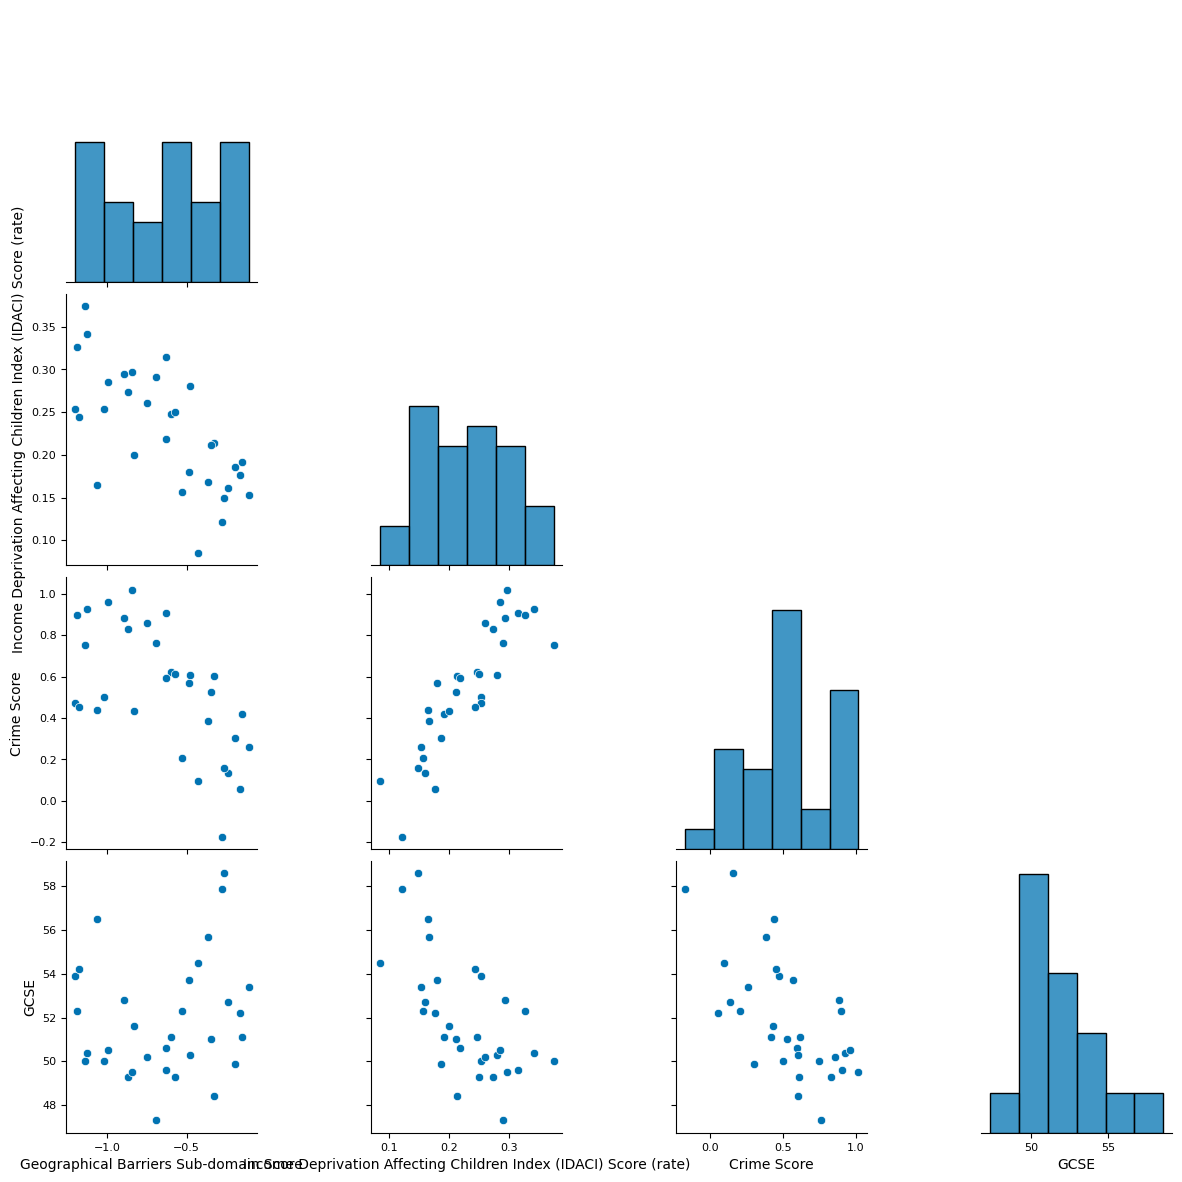

In [54]:
get_pairplot(subset2015)

<center><b>Figure 1.1 : Pairplot Scatter Matrix of Correlation of 2015 GCSE Score and the Independent Variables

Looking at the bottom row of the figure, we can see that there might be some relations between Geographical Barriers, Income Deprivation, and Crime score with GCSE score. The scatter plots between GCSE and Crime scores and Income Deprivation display patterns of negative relation, which means the higher the Crime score or Income Deprivation the lower the GCSE would be. On the other hand, the scatter plot between GCSE and Geographical Barriers displays a positive relation thus the better the Geographical Barriers the better the GCSE would be.

Next, we determine our explanatory variables for our Multi-Linear Regression Model by matching these variables. We started off by choosing variables with highest correlation with GCSE score as determined through the correlation analysis model above. We also made sure the variables chosen were not collinear with each other to build a model that can explain high variability.

We ran our variables that potentially best fit our model through the `get_multi_reg()` function defined earlier. After matching different variables, we managed to find a Multi-Linear Regression Model with the best R² value by matching these independent variables: __Geographical Barriers Sub-domain Score, Income Deprivation Affecting Children Index (IDACI) Score (rate), Crime Score.__

In [55]:
# assigning independent variables list for GCSE
independentGCSE = ['Geographical Barriers Sub-domain Score','Income Deprivation Affecting Children Index (IDACI) Score (rate)','Crime Score']

<center><b>Table 1.2 : Multi-Linear Regression Model (OLS) Summary of 2015 GCSE Score and the Independent Variables

In [56]:
get_multi_reg(london_2015['GCSE'] , london_2015[independentGCSE])

                            OLS Regression Results                            
Dep. Variable:                   GCSE   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     11.92
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           3.31e-05
Time:                        09:18:14   Log-Likelihood:                -63.277
No. Observations:                  32   AIC:                             134.6
Df Residuals:                      28   BIC:                             140.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

__Table 1.2__ represents the summary of our multi-linear regression model and it shows that our model has an adjusted R² value of 0.514 with an average of low p-value. This means that our chosen variables explained 51.4% of our GSCE score in London and could be considered as a good fit predictor model.

### Model Validation 

We evaluated our model by doing some validation tests which are as follows:

1. Coefficient of Determination (R²)
2. F-test (ANOVA)
3. Residual tests:
 - Standardized Residual
 - Normality
 - Autocorrelation
4. Regression Coefficient Plot
5. Residual Map

#### 1. Coefficient of determination (R²)

R² is the portion of the total variation in the dependent variable that is explained by variation in the independent variables. It assesses how far a statistical model foresee an outcome, depicted by the model's dependent variable. The lowest possible value of R² is 0 and the highest possible value is 1.

Below is the R² score generated from using the `get_rsquared()` function:

In [57]:
get_rsquared(london_2015['GCSE'] , london_2015[independentGCSE])

R2 score: 0.5607994387958459


The R² score obtained is 0.5608, which means 56.08% of our GCSE score can be explained using our independent variables and thus proving a good credibility of the model.

#### 2. F-test (ANOVA)

We used F-test to get the test value to determine whether our complex model performs better than a simpler model (single independent variable model). The outcome of the function will display the f_pvalue of our model. 

In [58]:
get_ftest(london_2015['GCSE'] , london_2015[independentGCSE])

f_pvalue: 3.307538545269384e-05


The p-value of F-statistic for this test is 3.308e-05 which is lower than 0.05. Thus we can deduce that our model has the potential to produce better predictions than other simpler model.

#### 3. Residual tests:
 - __Standardized residual:__ <br>
The scatter plot produced by this function helps to evaluate the strength of the discperancy between observed and expected values. It quantifies how big the residuals are in standard deviation units and thus can be simply used to detect outliers in the regression model. 

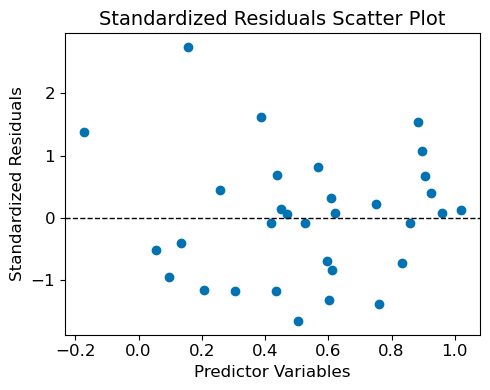

In [59]:
standardized_residuals(london_2015, london_2015['GCSE'] , london_2015[independentGCSE], london_2015['Crime Score'])

<b>Figure 1.2 : Standardized Residuals Scatter Plot of 2015 GCSE Score and the Independent Variables

As shown in __Figure 1.2__, we can see that none of the standardized residuals exceed an absolute value of 3. Thus, none of the observations appear to be outliers. This suggests that our model is a fit regression model as an influence to the GCSE score.

- __Normality:__ <br>
We examined the normality of residuals by plotting a histogram of the variables. Next, we referred to the p-value from the Anderson-Darling test and used the `normal_ad()` function from statsmodel to calculate our p-value. Then, we compared it to the threshold of 0.05.

p-value:  0.5317357589867473


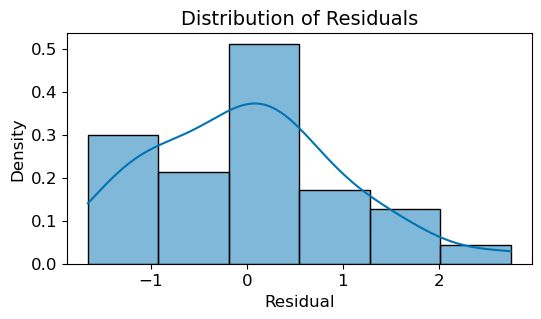

Residuals are normally distributed


In [60]:
get_normality(london_2015, london_2015['GCSE'] , london_2015[independentGCSE])

<b>Figure 1.3 : Distribution of Residuals of 2015 GCSE Score and the Independent Variables

As can be seen from __Figure 1.3__, our derived p-value is 0.5317 which can be considered normal because it is above the 0.05 threshold. The histogram plot also shows a normal distribution, despite it is a little skewed as we only have 33 observations in our dataset. Therefore, we can assume that our residuals are normally distributed.

- __Autocorrelation:__ <br>
This test was used by performing Durbin-Watson test to determine if either positive or negative correlation is present. We used the `durbin_watson()` function from statsmodel to calculate our Durbin-Watson score and then evaluated the value.

In [61]:
get_dW(london_2015, london_2015['GCSE'] , london_2015[independentGCSE])

Durbin-Watson: 1.5111189854143063


Our model produced a Durbin-Watson score of about 1.511 which is between 1.5 and 2.5, so we can infer that there is no autocorrelation in our residuals. Hence, the assumption is satisfied.

#### 4. Regression Coefficient Plot

We used this function to build a scatter plot of the estimates for each effect of variables in our model. It helps us to check the level of significance of our chosen explanatory variables.

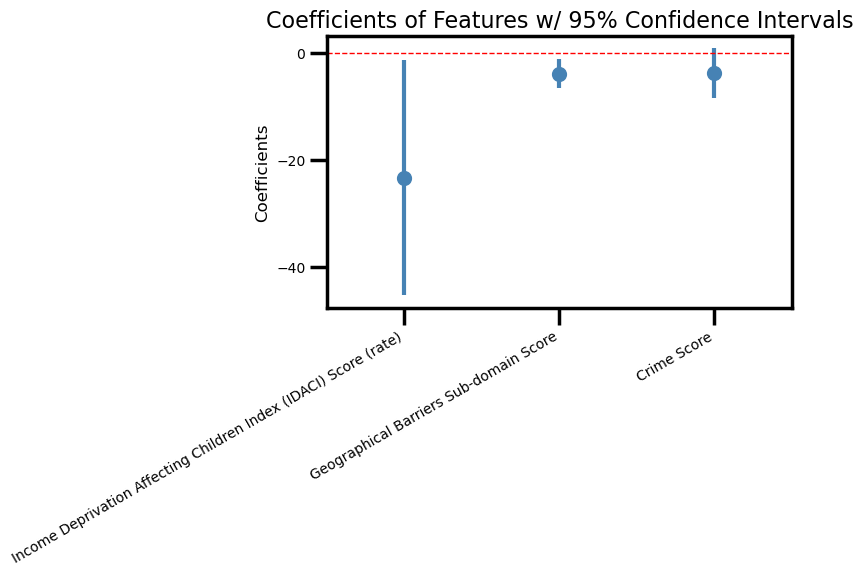

In [62]:
get_coefplot(london_2015['GCSE'] , london_2015[independentGCSE])

<center><b>Figure 1.4 : Regression Coefficient Plot of 2015 GCSE Score and the Independent Variables

It can be seen from __Figure 1.4__ that the IDACI has the widest confidence intervals and does not intersect the reference line at 0. This suggests that IDACI is the most significant variable among the three variables.

#### 5. Residual Map

The residuals in a model are the difference between values which the model could foresee and those recorded in the dataset. We translated the residual data to a map to display the variability of the model.

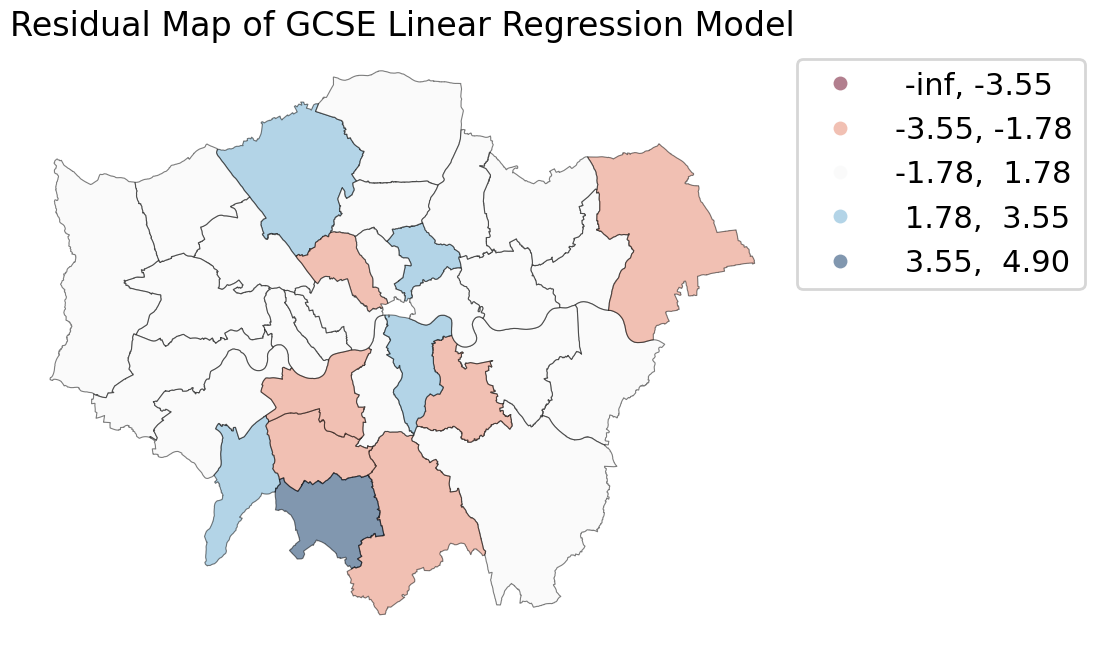

In [63]:
get_residual_map(london_2015, 'GCSE', london_2015['GCSE'] , london_2015[independentGCSE])

<center><b>Figure 1.5 : Residual Map of 2015 GCSE Score and the Independent Variables

Based on __Figure 1.5__, we could see there are more white areas compared to the blue and red areas. This tells us that our model can explain high variability as it can predict the actual GCSE score well.

## Objective 2 : To test the Linear Regression Model for GCSE score on 2019 dataset.

### Explanation of Results

The second objective of this project is to examine the linear regression model for the dataset of 2019 GCSE score in London using the the model created in Objective 1. We assigned similar explanatory variables in our model onto the 2019 IoD dataset. Then, we ran the validity tests again to see the fitness of the model on the newly introduced dataset.

__Table 2.1__ below shows the statistic summary of our new multi-linear regression model of GCSE score and the independent variables.

In [64]:
get_multi_reg(london_2019['GCSE'] , london_2019[independentGCSE])

                            OLS Regression Results                            
Dep. Variable:                   GCSE   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     16.28
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.56e-06
Time:                        09:18:15   Log-Likelihood:                -71.421
No. Observations:                  32   AIC:                             150.8
Df Residuals:                      28   BIC:                             156.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<center><b>Table 2.1 : Multi-Linear Regression Model (OLS) Summary of 2019 GCSE Score and the Independent Variables

In __Table 2.1__, the summary of the model shows that the adjusted R² is 0.597 and it has an average of low p-value. This denotes that 59.7% of our GSCE score in London can be interpreted by the independent variables. Hence, a good fit predictor model.

### Model Validation

Before we finalised our model, we checked it's accuracy by running several validation tests which are as follows:

1. Coefficient of Determination (R²)
2. F-test (ANOVA)
3. Residuals tests:
 - Standardized Residual
 - Normality
 - Autocorrelation
4. Regression Coefficient Plot
5. Residual Map

#### 1. Coefficient of determination (R²)

The R² score was generated from using the `.rsquared` function and it can be seen as follows.

In [65]:
get_rsquared(london_2019['GCSE'] , london_2019[independentGCSE])

R2 score: 0.6355783803872539


The R² score obtained is 0.6356, which suggests that 63.56% of our GCSE score can be explained using our independent variables and thus proving a good credibility of the model. In fact, this model is better than the model from Objective 1 which has a lower value of R².

#### 2. F-test (ANOVA)

We checked the performance of our model by calling using the F-test function to get the p-value of F-statistic.

In [66]:
get_ftest(london_2019['GCSE'] , london_2019[independentGCSE])

f_pvalue: 2.564529041826523e-06


According to the p-value of F-statistic = 2.565e-06, it is lower than 0.05 threshold. Therefore, we may deduce that our model has a potential to produce a better prediction than other simpler model.

#### 3. Residual tests:

 - __Standardized Residual:__ <br>
We examined the strength of the difference between observed and expected values using standardized residual. It measures how big the residuals are in standard deviation units and thus can be applied to detect outliers in the regression model. 

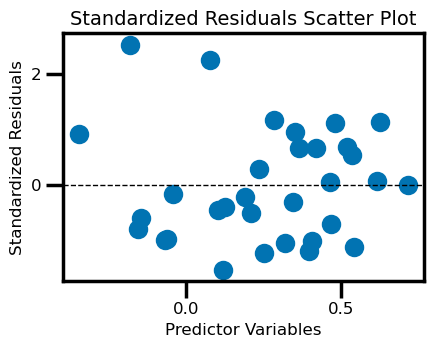

In [67]:
standardized_residuals(london_2019, london_2019['GCSE'] , london_2019[independentGCSE], london_2019['Crime Score'])


<b>Figure 2.1 : Standardized Residuals Scatter Plot of 2019 GCSE Score and the Independent Variables

As shown in __Figure 2.1__, we can see that none of the standardized residuals surpass an absolute value of 3. Thus, none of the observations seem to be outliers. This indicates our model is a good fit regression model for GCSE score.

- __Normality:__ <br>
We investigated the normality of the residuals by plotting it into histogram and observing the p-value from the Anderson-Darling test for normality. We applied the `normal_ad()` function from statsmodel to calculate our p-value and then compared it to threshold of 0.05.

p-value:  0.18181107559333706


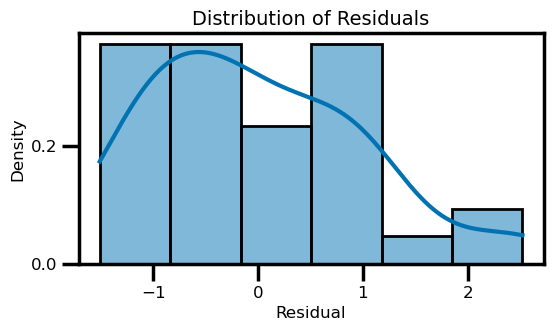

Residuals are normally distributed


In [68]:
get_normality(london_2019, london_2019['GCSE'] , london_2019[independentGCSE])

<b>Figure 2.2 : Distribution of Residuals of 2019 GCSE Score and the Independent Variables

Based on __Figure 2.2__, the p-value obtained is 0.182 which can be deemed as normal because it is above the 0.05 threshold. Moreover, the histogram plot represents a normal distribution, despite it is faintly skewed on the right because we only have 33 observations in our dataset. Hence, we can propose that our residuals are normally distributed.

- __Autocorrelation:__ <br>
For this test, we used Durbin-Watson test to determine if either positive or negative correlation exists. We used the `durbin_watson()` function from statsmodel to calculate our Durbin-Watson score and then evaluated the value.

In [69]:
get_dW(london_2019, london_2019['GCSE'], london_2019[independentGCSE])

Durbin-Watson: 1.6013828229023308


According to the result obtained, it displays a score of 1.601, which is between 1.5 and 2.5. For this reason, we can infer that there is no autocorrelation in our residuals, ergo satisfying the assumption.

#### 4. Regression Coefficient Plot

We investigated the level of significance of the selected explanatory variables to create a scatter plot of the estimates for each effect of variables in our model.

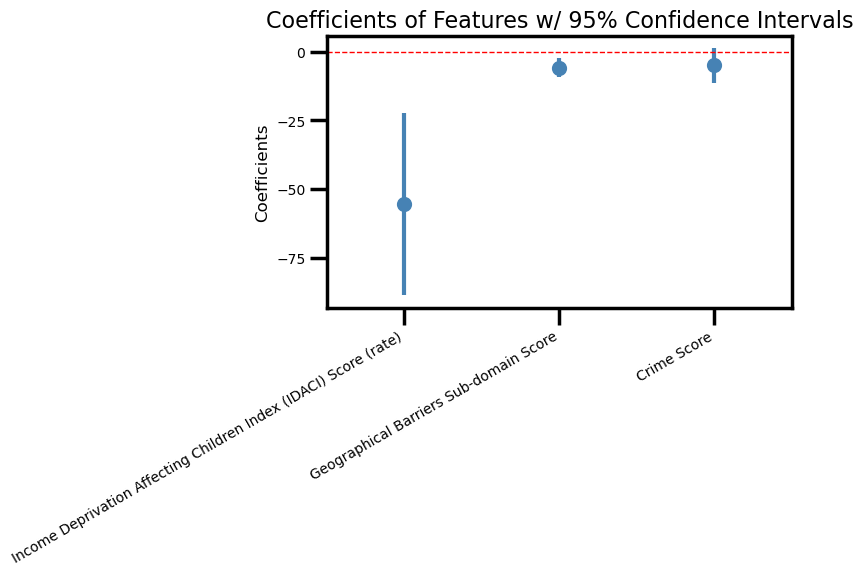

In [70]:
get_coefplot(london_2019['GCSE'] , london_2019[independentGCSE])

<center><b>Figure 2.3 : Regression Coefficient Plot of 2019 GCSE Score and the Independent Variables

From __Figure 2.3__, IDACI has the broadest confidence interval and does not cross the reference line at 0. This implies that IDACI has the highest significance level among the three variables. In addition, the result is consistent with our model from Objective 1.

#### 5. Residual Map

The residuals in a model are the distinction between values which the model could envision and those recorded in the dataset. We interpreted this residual data to a map so that we would be able to view the patterns of how well our model would predict.

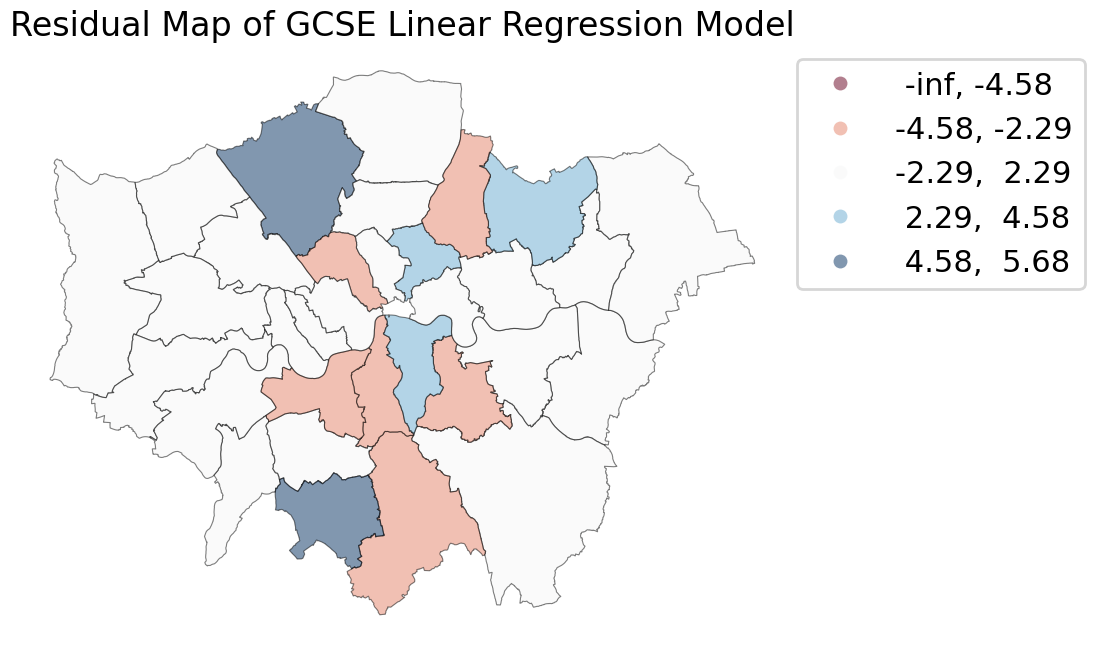

In [71]:
get_residual_map(london_2019, 'GCSE', london_2019['GCSE'] , london_2019[independentGCSE])

<center><b>Figure 2.4 : Residuals Map of 2019 GCSE Score and the Independent Variables

Based on __Figure 2.4__, we could see there are more white areas which represents closeness of predicted data with actual value. This shows that the model created based on the 2015 datasets can predict the 2019 GCSE scores well.

After we have conducted the tests and visualizations on the 2019 GCSE score model, we believe that the Multi-Linear Regression Model we built for 2015 GCSE score is a good fit regression model. This is due to the possibility of the model to do prediction on the GCSE scores from 2019 dataset with a good level of accuracy. Furthermore, we learned that IDACI is the most significant variable that could influence the GCSE score in both 2015 and 2019.

## Objective 3: To build a Linear Regression Model for Crime score in 2015 and to test the model on 2019 dataset.

### Explanation of Results

The third goal of the project is to study the association between Crime score and the variables of the 2015 IoD dataset in London. For that purpose, we generated a multi-linear regression model using Ordinary Least Squared (OLS) to get a statistical information corresponding to the dataset. Then, we tested the regression on the same model based on 2019 IoD dataset.

Based on __Table 3.1__ below, the five factors we chose that have the highest absolute correlation values with the Crime Score: 

+ Income Score (rate)
+ Employment Score (rate)                      
+ IDACI Score (rate) 
+ Health Deprivation and Disability Score
+ GCSE

<center><b>Table 3.1 : Correlation Table of IoD London 2015</b></center>

In [72]:
get_correlation(london_2015)

Index of Multiple Deprivation (IMD) Score  \
Index of Multiple Deprivation (IMD) Score                                            1.000000   
Income Score (rate)                                                                  0.975641   
Employment Score (rate)                                                              0.958608   
Education, Skills and Training Score                                                 0.563869   
Health Deprivation and Disability Score                                              0.897452   
Crime Score                                                                          0.922645   
Barriers to Housing and Services Score                                               0.807558   
Living Environment Score                                                             0.587873   
Income Deprivation Affecting Children Index (ID...                                   0.952437   
Income Deprivation Affecting Older People (IDAO...                                   0.908834   
Children and Young People Sub-domain Score                                           0.839652   
Adult Skills Sub-domain Score                                                        0.319771   
Geographical Barriers Sub-domain Score                                              -0.735010   
Wider Barriers Sub-domain Score                                                      0.879267   
Indoors Sub-domain Score                                                             0.552080   
Outdoors Sub-domain Score                                                            0.612268   
GCSE                                                                                -0.559131   

                                                    Income Score (rate)  \
Index of Multiple Deprivation (IMD) Score                      0.975641   
Income Score (rate)                                            1.000000   
Employment Score (rate)                                        0.976446   
Education, Skills and Training Score                           0.644925   
Health Deprivation and Disability Score                        0.907116   
Crime Score                                                    0.896485   
Barriers to Housing and Services Score                         0.764731   
Living Environment Score                                       0.452329   
Income Deprivation Affecting Children Index (ID...             0.970809   
Income Deprivation Affecting Older People (IDAO...             0.900836   
Children and Young People Sub-domain Score                     0.854623   
Adult Skills Sub-domain Score                                  0.429976   
Geographical Barriers Sub-domain Score                        -0.641045   
Wider Barriers Sub-domain Score                                0.819061   
Indoors Sub-domain Score                                       0.424667   
Outdoors Sub-domain Score                                      0.489106   
GCSE                                                          -0.615738   

                                                    Employment Score (rate)  \
Index of Multiple Deprivation (IMD) Score                          0.958608   
Income Score (rate)                                                0.976446   
Employment Score (rate)                                            1.000000   
Education, Skills and Training Score                               0.689689   
Health Deprivation and Disability Score                            0.904927   
Crime Score                                                        0.889892   
Barriers to Housing and Services Score                             0.706174   
Living Environment Score                                           0.412850   
Income Deprivation Affecting Children Index (ID...                 0.944132   
Income Deprivation Affecting Older People (IDAO...                 0.823272   
Children and Young People Sub-domain Score                         0.900087   
Adult 

As some of the selected factors are collinear to each other, they would not fit our model. Thus, we made sure there was no multicollinearity in the model by diversifying the matching of the chosen variables with other variables using regression. The independent factors were selected in accordance with the result of correlation with the Crime score. Then, they were tested with each variable to achieve the best fit multi-linear regression model. Consequently, the Adult skills sub-domain score showed a great compatibility with the model.

In the following __Figure 3.1__ below, it displays the correlation between Crime score and independent variables: __Income score (rate), Adult Skills Sub-domain score, GCSE__.

<Figure size 600x600 with 0 Axes>

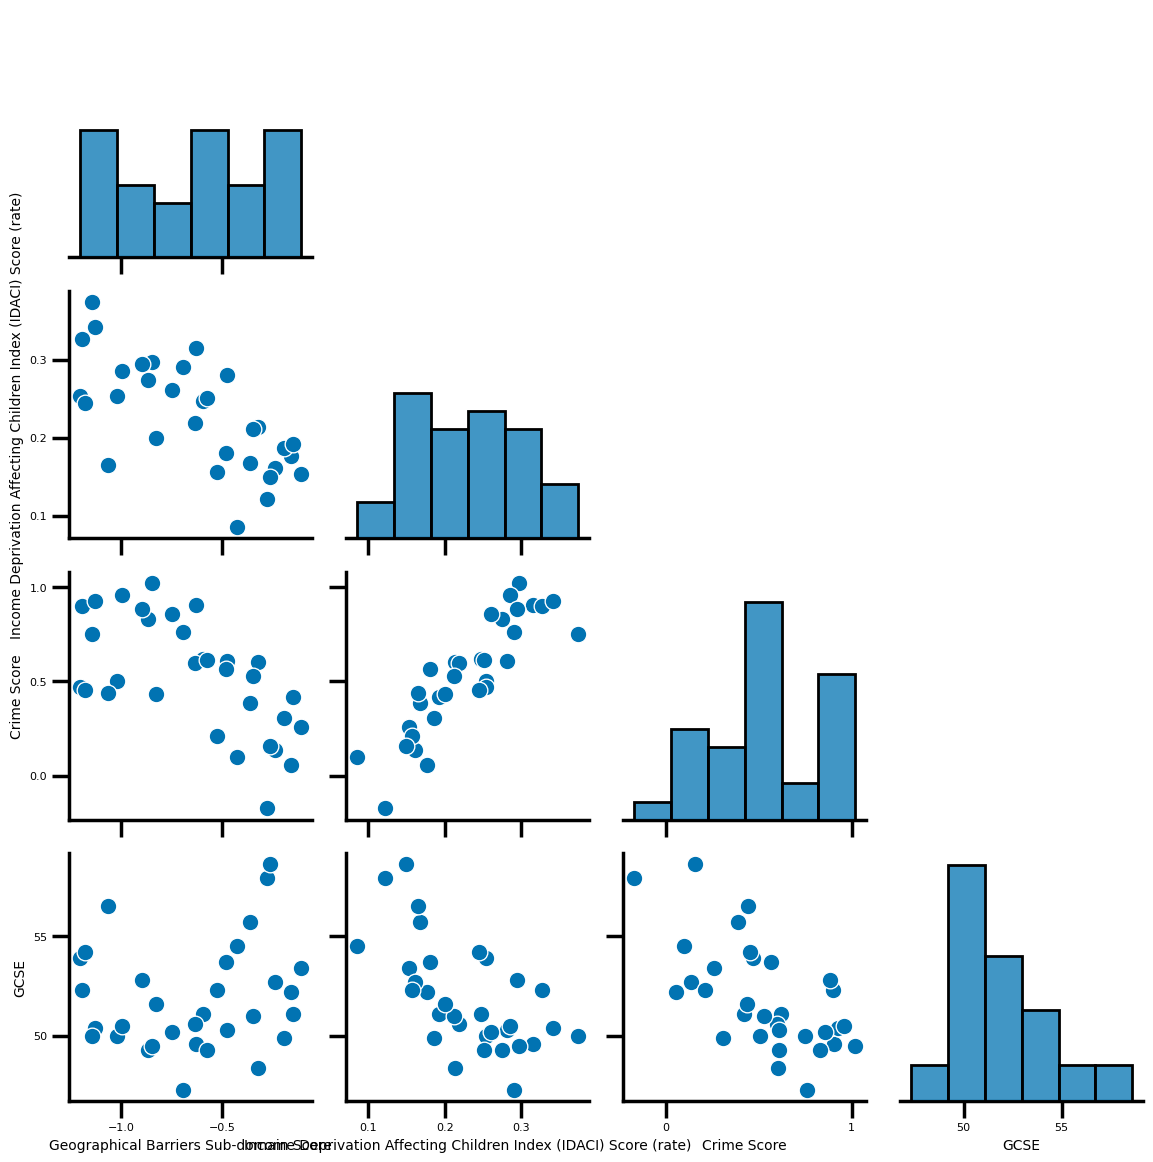

In [73]:
get_pairplot(subset2015)

<center><b>Figure 3.1 : Pairplot Scatter Matrix of 2015 Crime Score and the Independent Variables
    

As shown in __Figure 3.1__, we can say that there are possible relationships between Crime score, Income score (rate), Adult Skills Sub-domain score and GCSE score. The plot between Crime score and GCSE score displays a pattern of negative relation, which means the higher the GCSE score the lower the Crime score would be. At the same time, the plots between Crime score and Income score (rate) and Adult Skills Sub-domain score exhibit positive relationships. This means the better the Income score (rate) and Adult Skills Sub-domain score, the better the Crime score would be.

We then ran these variables through the `get_multi_reg()` function defined earlier. After matching different variables, we managed to find a Multi-Linear Regression Model for Crime score with best R² value by matching these independent variables: __Income Score (rate), Adult Skills Sub-domain Score, GCSE.__

In [74]:
#independent variables list for Crime Score:
independentCrime = ['Income Score (rate)', 'Adult Skills Sub-domain Score', 'GCSE']

Next, we will create a linear regression model between 2015 Crime score and the selected explanatory variables from the dataset of 2015 IoD in London. We will then test the same model on the 2019 IoD dataset in London to test the fitness of the model.

The table below shows the statistic summary of our multi-linear regression model for 2015 Crime score:

In [75]:
get_multi_reg(london_2015['Crime Score'] , london_2015[independentCrime])

                            OLS Regression Results                            
Dep. Variable:            Crime Score   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     46.15
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           5.78e-11
Time:                        09:18:19   Log-Likelihood:                 22.068
No. Observations:                  32   AIC:                            -36.14
Df Residuals:                      28   BIC:                            -30.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<center><b>Table 3.2 : Multi-linear Regression Model (OLS) Summary of 2015 Crime Score and the Independent Variables

From __Table 3.2__, the result of the adjusted R² of 2015 Crime score and the independent variables indicates a value of 0.814. This conveys that 81.4% of Crime Score in London can be described by our selected variables and thus it can be considered as a good fit of predictor model.

<br>

The table below provides the statistic summary of our multi-linear regression model for 2019 Crime score:

<center><b>Table 3.3 : Multi-linear Regression Model (OLS) Summary of 2019 Crime Score and the Independent Variables

In [76]:
get_multi_reg(london_2019['Crime Score'] , london_2019[independentCrime])

                            OLS Regression Results                            
Dep. Variable:            Crime Score   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     41.08
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.19e-10
Time:                        09:18:19   Log-Likelihood:                 24.144
No. Observations:                  32   AIC:                            -40.29
Df Residuals:                      28   BIC:                            -34.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

According to __Table 3.3__, the adjusted R² of 2019 Crime score and the chosen variables slightly decreases to 0.795. However, the model can still be considered acceptable as a good regression model as it has an average of low p-value. This also implies that the model have the potential to predict 79.5% of the Crime score in London.

Subsequently, we validified the condition of the models by running a few validation tests and mapped them to see the residuals.

### Model Validation

We evaluated our model by doing some validation test as below:

1. Coefficient of Determination (R²)
2. F-test (ANOVA)
3. Residual tests:
 - Standardized Residual
 - Normality
 - Autocorrelation
4. Regression Coefficient Plot
5. Residual Map

#### 1. Coefficient of determination (R²)

We used `.rsquared` function to obtain R² scores of 2015 and 2019 Crime scores and the selected explanatory variables.

R² scores of 2015 Crime Score and the independent variables:

In [77]:
get_rsquared(london_2015['Crime Score'] , london_2015[independentCrime])

R2 score: 0.8317771470806656


The R² score obtained is 0.832, which means 83.2% of Crime Score can be explained using our independent variables and thus proving a good credibility of the model.

<br>
R² scores of 2019 Crime Score and the independent variables:

In [78]:
get_rsquared(london_2019['Crime Score'] , london_2019[independentCrime])

R2 score: 0.8148566452362513


The R² score for this model is 0.815, which also means 81.5% of our Crime Score can be interpreted using the selected independent variables and hence showing a good reliability of the model.

According to both R² scores, we can propose that both models are adequate enough to explain the total variability in the data.

#### 2. F-test (ANOVA)

We assessed the execution of our models by using the F-test function to get the p-value of F-statistic.

F-test of 2015 Crime score and the independent variables:

In [79]:
get_ftest(london_2015['Crime Score'] , london_2015[independentCrime])

f_pvalue: 5.78329780723312e-11


The result of F-test of the model is 5.783e-11. Since the p-value is lower than 0.05 thus we can deduce the model has a potential to produce a better prediction than a simpler model.

<br>
F-test of 2019 Crime score and the independent variables:

In [80]:
get_ftest(london_2019['Crime Score'] , london_2019[independentCrime])

f_pvalue: 2.1917485218586703e-10


The outcome of F-test of the model is 2.192e-10 which is lower than 0.05. Therefore, we can assume the model is likely possible to form a greater prediction than a simpler model.

#### 3. Residual tests:
-  __Standardized Residual:__ <br>
The strength of the difference between observed and expected values was evaluated based on the scatter plot of standardized residual for both models.

The following figure displays the standardized residuals scatter plot of 2015 Crime score and the independent variables:

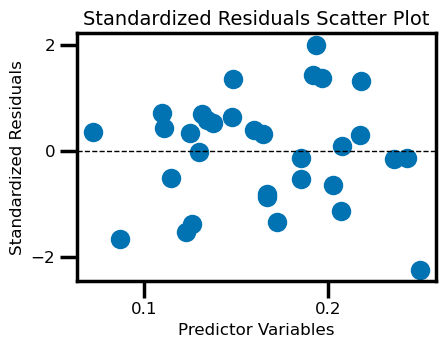

In [81]:
standardized_residuals(london_2015, london_2015['Crime Score'], london_2015[independentCrime], london_2015['Income Score (rate)'])

<b>Figure 3.2 : Standardized Residuals Scatter Plot of 2015 Crime Score and the Independent Variables

From __Figure 3.2__, it shows none of the residuals transcends an absolute value of 3. Thus, none of the observations appears to be outliers.

<br>
The following figure displays the standardized residuals scatter plot of 2019 Crime score and the independent variables:

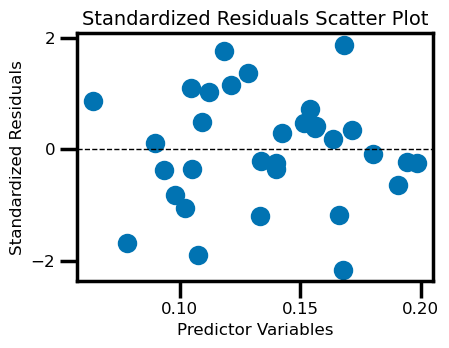

In [82]:
standardized_residuals(london_2019, london_2019['Crime Score'] , london_2019[independentCrime], london_2019['Income Score (rate)'])

<b>Figure 3.3 : Standardized Residuals Scatter Plot of 2019 Crime Score and the Independent Variables

There is no part of the residuals exceed an absolute value of 3 as shown in __Figure 3.3__. Therefore, none of the observations seems to be outliers.


From the observations on both results, it denotes that the two models are regarded fit as regression models for the prediction of the Crime score.

- __Normality:__ <br>
This test examines the normality of the residuals by plotting it into histogram and compare the p-value obtained to the threshold value of 0.05 using the Anderson-Darling test. We assumed that if the obtained p-value is higher than the threshold, then the residuals are normally distributed.

Normality test of 2015 Crime Score and the independent variables:

p-value:  0.5197783200564905


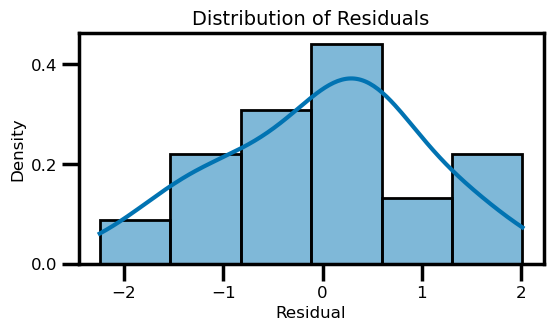

Residuals are normally distributed


In [83]:
get_normality(london_2015, london_2015['Crime Score'] , london_2015[independentCrime])

<b>Figure 3.4 : Distribution of Residuals of 2015 Crime score and the Independent Variables

The p-value obtained is 0.520 which is higher than the threshold. Therefore, we can imply that the residuals are normally distributed.

<br>
Normality test of 2019 Crime score and the independent variables:

p-value:  0.876433337751194


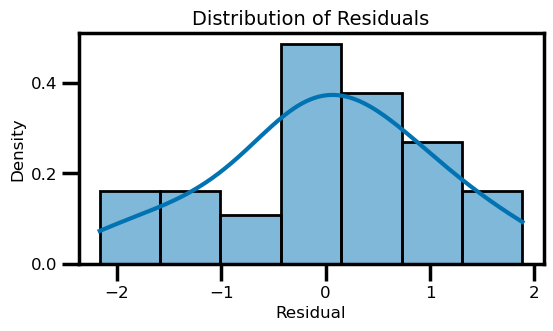

Residuals are normally distributed


In [84]:
get_normality(london_2019, london_2019['Crime Score'] , london_2019[independentCrime])

<b>Figure 3.5 : Distribution of Residuals of 2019 Crime Score and the Independent Variables

The outcome of p-value is 0.876. We also can presume that the residuals are normally distributed.

Hence, this makes the assumptions of the models valid as good prediction models.

- __Autocorrelation:__ <br>
We applied Durbin-Watson test on the models to determine if either positive or negative correlation is present and then proceeded to assessing the conditions.

Autocorrelation test of 2015 Crime Score and the independent variables:

In [85]:
get_dW(london_2015, london_2015['Crime Score'] , london_2015[independentCrime])

Durbin-Watson: 2.4626179845496488


The Durbin-Watson score shows the value of 2.463. Since it is between 1.5 and 2.5, we can assume that there is no autocorrelation in the residuals.

<br>
Autocorrelation test of 2019 Crime score and the independent variables:

In [86]:
get_dW(london_2019, london_2019['Crime Score'] , london_2019[independentCrime])

Durbin-Watson: 2.2448323867111544


The Durbin-Watson score obtained is 2.245. Given that the value is between 1.5 and 2.5, we can imply that there is none of  autocorrelation exists in the residuals.

Based on the outcomes, they satisfied the assumptions of both models having a high degree of similarity and thus proving the reliability of the models in forming predictions.

__4. Regression Coefficient Plot:__

We plotted coefficient values to visualise the estimates predictor parameters and the response in a regression model.

The figure below shows the plot of regression coefficient of 2015 Crime score and the selected independent variables:

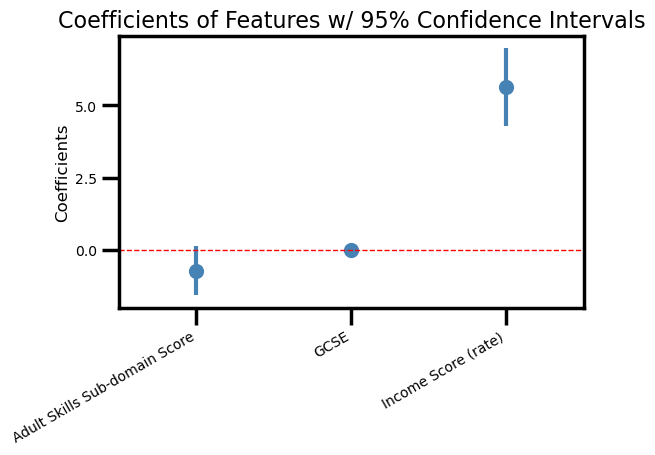

In [87]:
get_coefplot(london_2015['Crime Score'] , london_2015[independentCrime])

<b>Figure 3.6 : Regression Coefficient Plot of 2015 Crime Score and the Independent Variables

With reference to __Figure 3.6__, the spreadness of the confidence interval of Income score (rate) is the widest and does not cross the reference line at 0. This shows that among the three variables, Income score (rate) has the strongest relationship with Crime score.

The following figure represents the plot of regression coefficient of 2019 Crime score and the chosen independent variables:

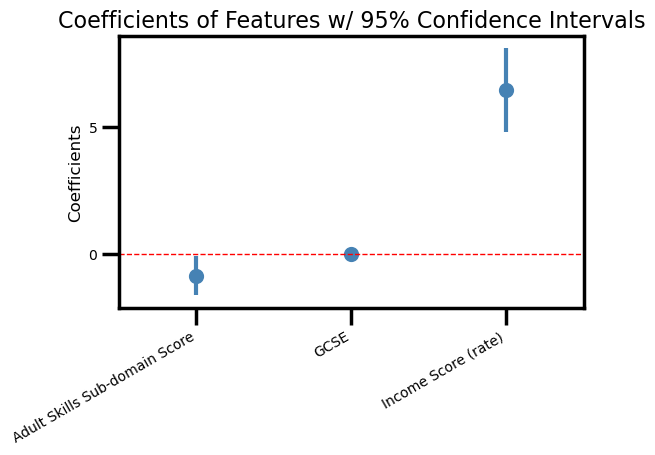

In [88]:
get_coefplot(london_2019['Crime Score'] , london_2019[independentCrime])

<b>Figure 3.7 : Regression Coefficient Plot of 2019 Crime Score and the Independent Variables

Based on __Figure 3.7__, Income score (rate) too has the broadest confidence interval and does not cross the reference line at 0. This implies that Income score (rate) has the highest significance level than the other variables. 

According to the regression coefficient of both models, we can assume that Income score (rate) has the strongest association with Crime score.

__5. Residual Map__

Next, we will map the residuals of the Linear Regression Model of the 2015 Crime score and 2019 Crime Score. The residual map helps to demonstrate the fitness level of the regression model. Residual is the difference between actual and predicted values. Positive value means that the actual data is higher than prediction, while negative value reflects lower than prediction.

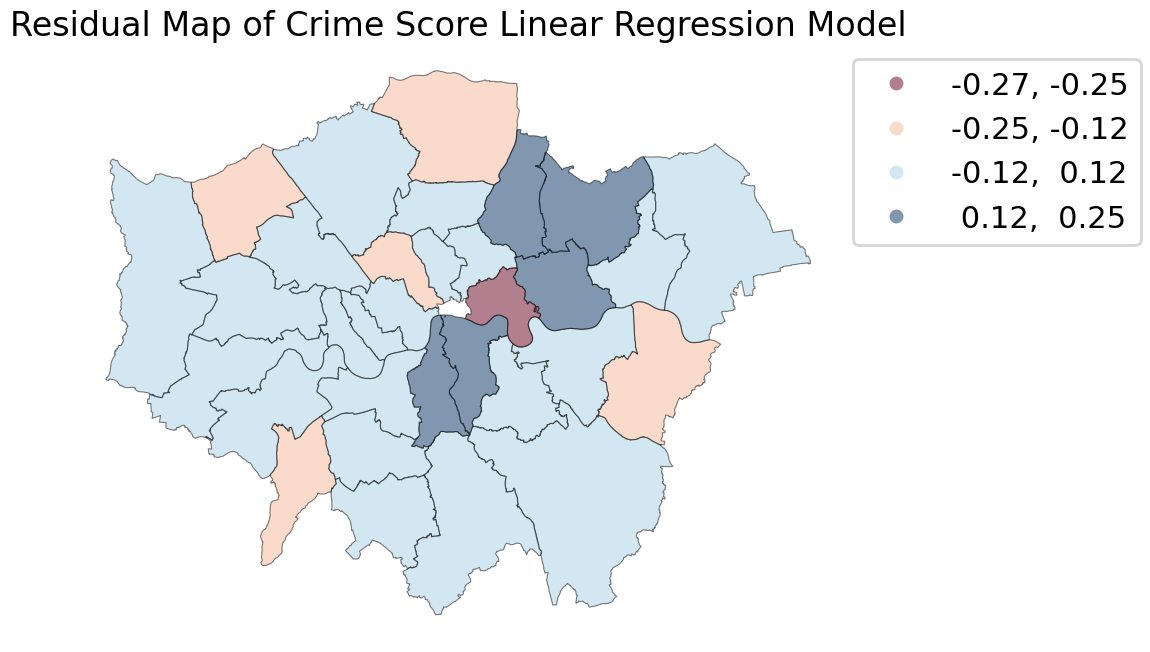

In [89]:
#call the residual map function
get_residual_map(london_2015, 'Crime Score', london_2015['Crime Score'] , london_2015[independentCrime])

<center><b>Figure 3.8 : Residual Map of 2015 Crime Score and the Independent Variables</b></center>

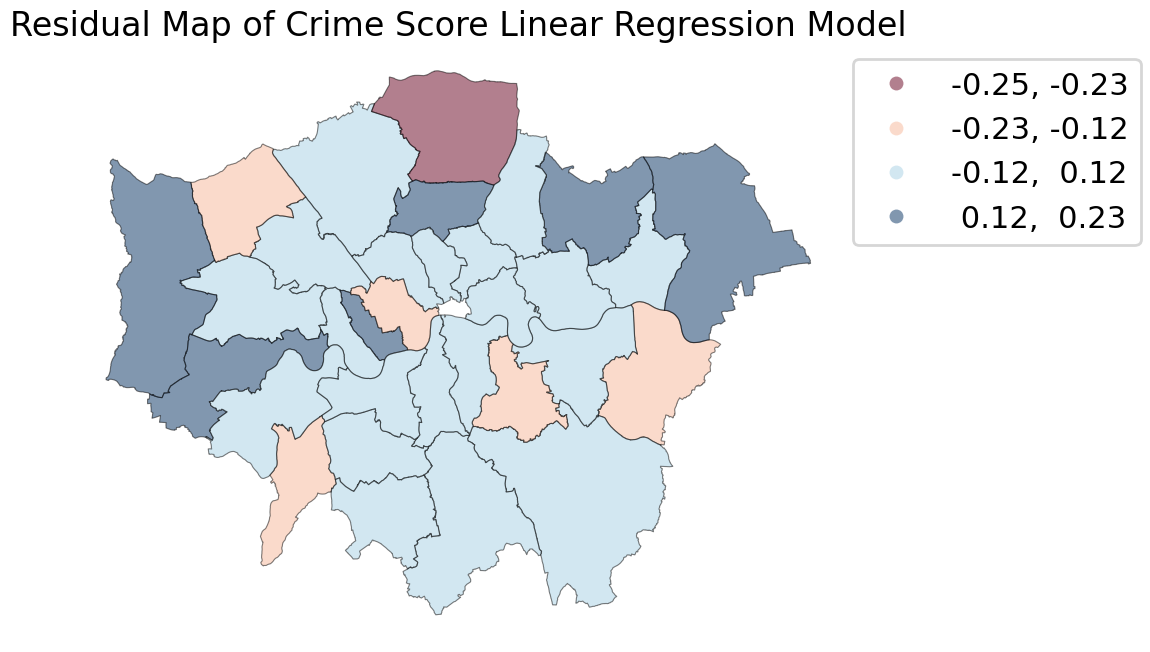

In [90]:
#call the residual map function
get_residual_map(london_2019, 'Crime Score', london_2019['Crime Score'] , london_2019[independentCrime])

<center><b>Figure 3.9 : Residual Map of 2019 Crime Score and the Independent Variables</b></center>

From Figure 3.8, we can see from the map above that most of the data are in light blue which has a residual value between -0.12 and 0.12. Hence, we can deduce that the model represents accurately most of our Crime score data for 2015. There is no systematic pattern which suggests any significant spatial pattern.

Repeatedly, we can see that most of the areas are in light blue which has residual values between -0.12 and 0.12 in Figure 3.9. We can infer that the model created fits the dataset of both 2015 and 2019 in determining the crime score. There is no significant spatial pattern to confer.

## Objective 4 : To determine how the distributions vary spatially between the Inner and Outer boroughs of London.

### Explanation of Results

Our final objective of this project is divided into two sub-objectives: to find out the significant difference in GCSE and Crime score between Inner and Outer London; to find out their spatial patterns between Inner and Outer London. A t-test function was executed to calculate the standard error in the difference between the means. It can be interpreted to see how likely it differs if the samples in Inner and Outer London have the same mean.

We used a violin plot to demonstrate the numeric data to compare the distribution of GCSE and Crime score in Inner and Outer London. This method can be considered as the combination of a box plot with a kernel density plot. We used the `get_violin(df, dependent)` function to perform this action.

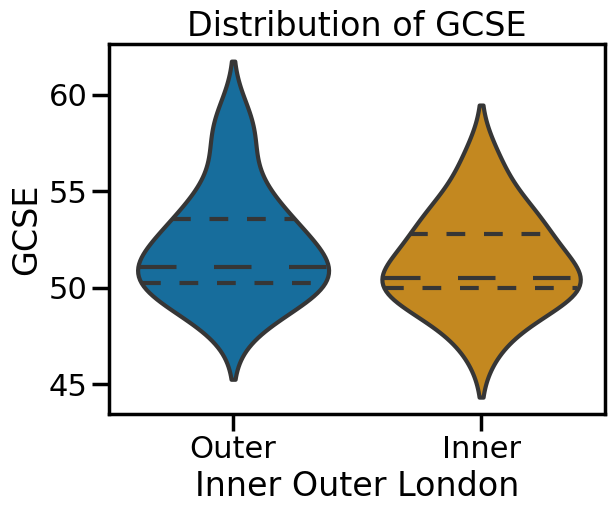

In [91]:
get_violin(london_2015, 'GCSE')

<center><b>Figure 4.1 : Distribution of GCSE</b></center>

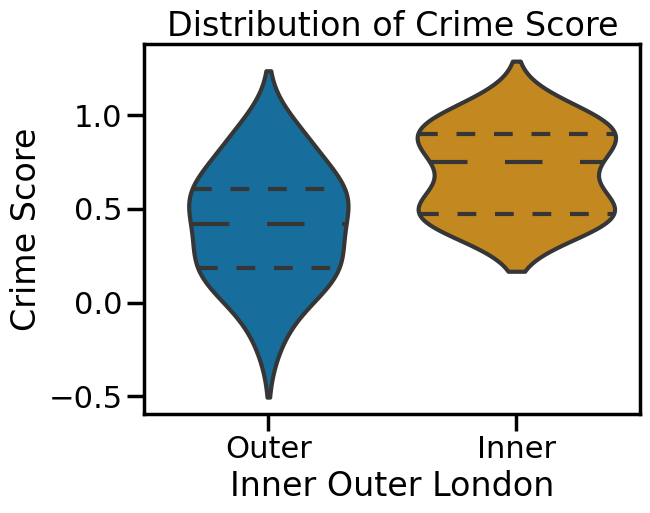

In [92]:
get_violin(london_2015, 'Crime Score')

<center><b>Figure 4.2 : Distribution of Crime Score</b></center>

__Figure 4.1__ shows the distribution of GCSE scores of Inner and Outer London. It can be seen that Outer London has a higher maximum GCSE score, while Inner London has a lower minimum score. While the mean and interquartile ranges of Inner London seems lower than Outer London, it is best to test whether there is a statistical significant difference between the means by conducting an independant t-test.

It can be seen in __Figure 4.2__ that the violin plot of the Crime score for Outer London stretches from -0.5 to higher than 1.0, while the minimum score for Inner London is higher than 0. The lower quartile range of Inner London is higher than the mean of Outer London which suggests a significant difference in means.

### Data Validation

To test whether there is a statistical significant difference between the means of both scores between Inner and Outer London, we conducted an independent t-test using the `get_ttest(df, dependent)` function.

**T-test of GCSE score:**

In [93]:
get_ttest(london_2015, "GCSE")

Ttest_indResult(statistic=-0.8781308649697237, pvalue=0.3873259575047695)

**T-test of Crime score:**

In [94]:
get_ttest(london_2015, "Crime Score")

Ttest_indResult(statistic=3.0528777442474535, pvalue=0.004748514583871899)

The t-test of **GCSE score** shows a p-value of 0.387 which is higher than 0.05. There is not enough evidence to prove that there is a statistically significant difference in the mean of GCSE score between Inner and Outer London.

However, the p-value obtained for the **Crime score** is lower than 0.05. This implies that the Crime score has a significant difference between Inner and Outer London.

### Data Visualisation

To view the distibution of GCSE and Crime score in Inner and Outer London, we will plot the choropleth map again using the `get_choropleth(dependent)` function and check for any significant spatial pattern.

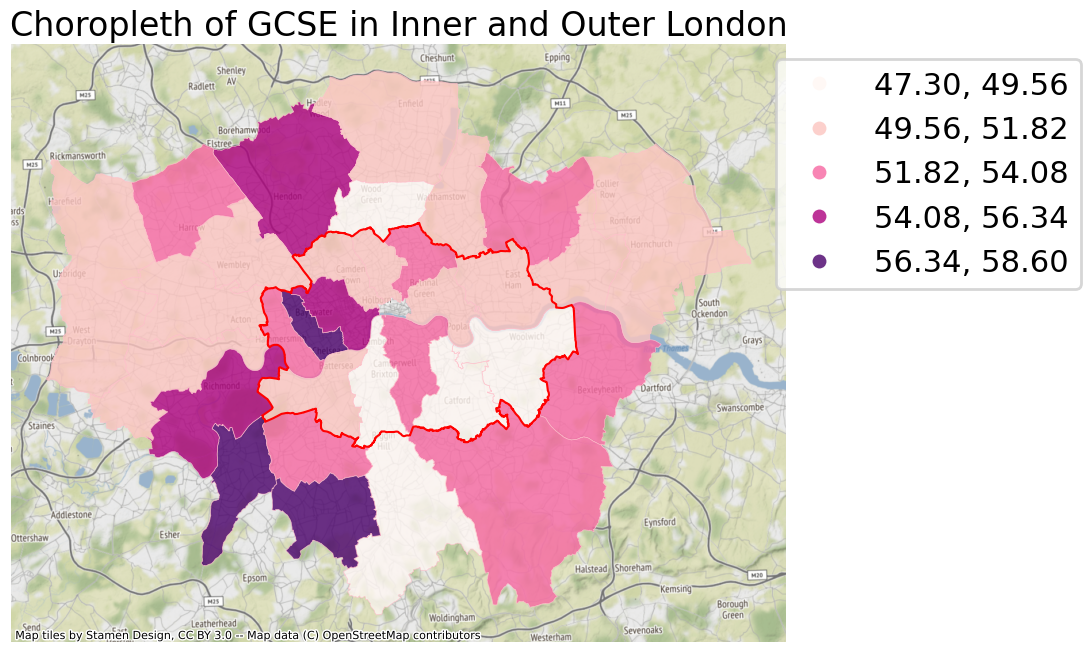

In [95]:
get_choropleth("GCSE")

<center><b>Figure 4.3 : Choropleth of GCSE</b></center>

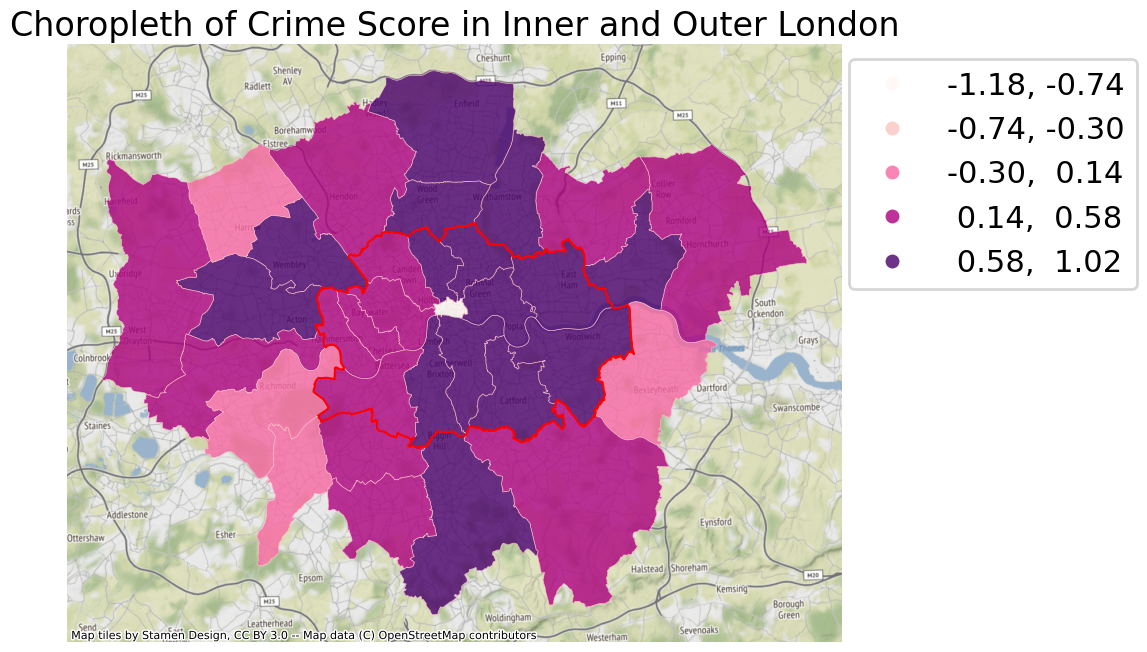

In [96]:
get_choropleth("Crime Score")

<center><b>Figure 4.4 : Choropleth of Crime Score</b></center>

In __Figure 4.3__, there is no significant spatial pattern can be drawn between Inner and Outer London. This is also aligned with the insignificant difference in means tested earlier. It can be concluded that there is no association for the GCSE scores between Inner and Outer London.

In __Figure 4.4__, it can be seen that the distribution of scores is higher in Inner London based on the darker colours as compared to Outer London. Lower scores reflects higher crime rate. It can hence be inferred that the crime rate is higher in Outer London as compared to Inner London. This difference is also statistically supported by the t-test conducted earlier.

# Conclusion (5 marks)

### Achievements
We managed to create machine learning algorithms through two Linear Regeression Models to predict GCSE and Crime scores individually for the boroughs in London. The models have adjusted R² values of 0.51 and 0.79 respectively which indicates that high variability can be explained by both models. 

We also managed to investigate the distribution of scores between Inner and Outer London and find out that only Crime score has a significant difference while GCSE scores were normally distributed between both areas.

### Limitations

The biggest limitation to our study is the discrepancy between variables in datasets collected. The model we created might be too specific to London. Ideally, we would like to generalise our model and test our machine learning algorithms on other cities in England, however the GCSE data collected only has averaged scores for other cities.

To improve our regression model, it would be best for it to be built and tested upon datasets from other years. However, we are only able to test on datasets from 2015 and 2019 as they have standardized variables.

It was also not possible to compare the effect of deprivation on GCSE and Crime scores for students from different demographics such as ethnicities or gender, because such data were available in 2019 but not in 2015.

### Future Work

Further work can be done to study the impact of deprivation on different demographics of students including age, gender, location, and ethnicities to generalise the model at the national level. We hypothesise that the deprivation might have different affect across different demographics. With more data, we can build a more comprehensive model.